# 01. Data Explorer

Analyze an example flight to know about each column and build pre-processing steps.

## 01. Imports and Settings

In [1]:
# Imports
from libs.plots import (
    show_boxplot,
    show_histogram,
    show_scatterplot
)  # plots.py
from libs.pre_process import categorical_encoder  # pre_process.py

import ast
import pandas as pd
import warnings


# Ignore warnings
warnings.filterwarnings("ignore")

# Pandas settings
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_colwidth", 150)  # Increase column width

# Default path
DATA_PATH = "data/"

## 02. Load and Pre-Process Data

In [2]:
# Load flight example data
flight_df = pd.read_csv(f"{DATA_PATH}raw/flight_example.csv")

# Convert string column 'Sensors' to dictionary
flight_df["Sensors"] = flight_df["Sensors"].apply(ast.literal_eval)
# Expand 'Sensors' column
sensors_df = pd.json_normalize(flight_df["Sensors"])
# Add new columns to the flight DataFrame
flight_df = flight_df.join(sensors_df).drop("Sensors", axis=1)

In [3]:
# Selected columns
selected_cols = ["Timestamp",
                 "SpeedChanged_speedX", "SpeedChanged_speedY", "SpeedChanged_speedZ",
                 "AltitudeChanged_altitude",
                 "AttitudeChanged_roll", "AttitudeChanged_pitch", "AttitudeChanged_yaw",
                 "GpsLocationChanged_latitude", "GpsLocationChanged_longitude", "GpsLocationChanged_altitude",
                 "GpsLocationChanged_latitude_accuracy", "GpsLocationChanged_longitude_accuracy", "GpsLocationChanged_altitude_accuracy",
                 "HomeChanged_latitude", "HomeChanged_longitude", "HomeChanged_altitude",
                 "HomeTypeAvailabilityChanged_type",
                 "FlyingStateChanged_state", 
                 "moveByEnd_dX", "moveByEnd_dY", "moveByEnd_dZ", "moveByEnd_dPsi", 
                 "WifiSignalChanged_rssi",
                 "BatteryStateChanged_percent"]

# Only previous columns in flight DataFrame
flight_df = flight_df[selected_cols]

# Replacing NaN data
# Categorial data
flight_df["HomeTypeAvailabilityChanged_type"] = flight_df["HomeTypeAvailabilityChanged_type"].fillna("UNKNOWN")
flight_df["FlyingStateChanged_state"] = flight_df["FlyingStateChanged_state"].fillna("unknown")
flight_df.fillna(0, inplace=True)  # Numerical data

## 03. Flight Information

Available in:
- https://github.com/amymcgovern/pyparrot/blob/master/pyparrot/commandsandsensors/ardrone3.xml
- https://github.com/amymcgovern/pyparrot/blob/master/pyparrot/commandsandsensors/common.xml

#### _Timestamp_

Date in milliseconds of each flight data.

In [4]:
# Timestamp
flight_df.Timestamp.head()

0   1721937703.55
1   1721937703.65
2   1721937703.75
3   1721937703.86
4   1721937703.97
Name: Timestamp, dtype: float64

In [5]:
# Convert Timestamp to Datetime
# Selection of specific flight times
flight_df["DateTime"] = pd.to_datetime(flight_df["Timestamp"], unit="s")

In [6]:
# DateTime
flight_df.DateTime.head()

0   2024-07-25 20:01:43.552396059
1   2024-07-25 20:01:43.653719664
2   2024-07-25 20:01:43.754766226
3   2024-07-25 20:01:43.863573551
4   2024-07-25 20:01:43.965215445
Name: DateTime, dtype: datetime64[ns]

### 03.1. _SpeedChanged_

Drone's speed changed. Expressed in the NED referential (North-East-Down).

- _**SpeedChanged_speedX**_: Speed relative to the North (when drone moves to the north, speed is > 0) (in m/s);
- _**SpeedChanged_speedY**_: Speed relative to the East (when drone moves to the east, speed is > 0) (in m/s);
- _**SpeedChanged_speedZ**_: Speed on the z axis (when drone moves down, speed is > 0) (in m/s).

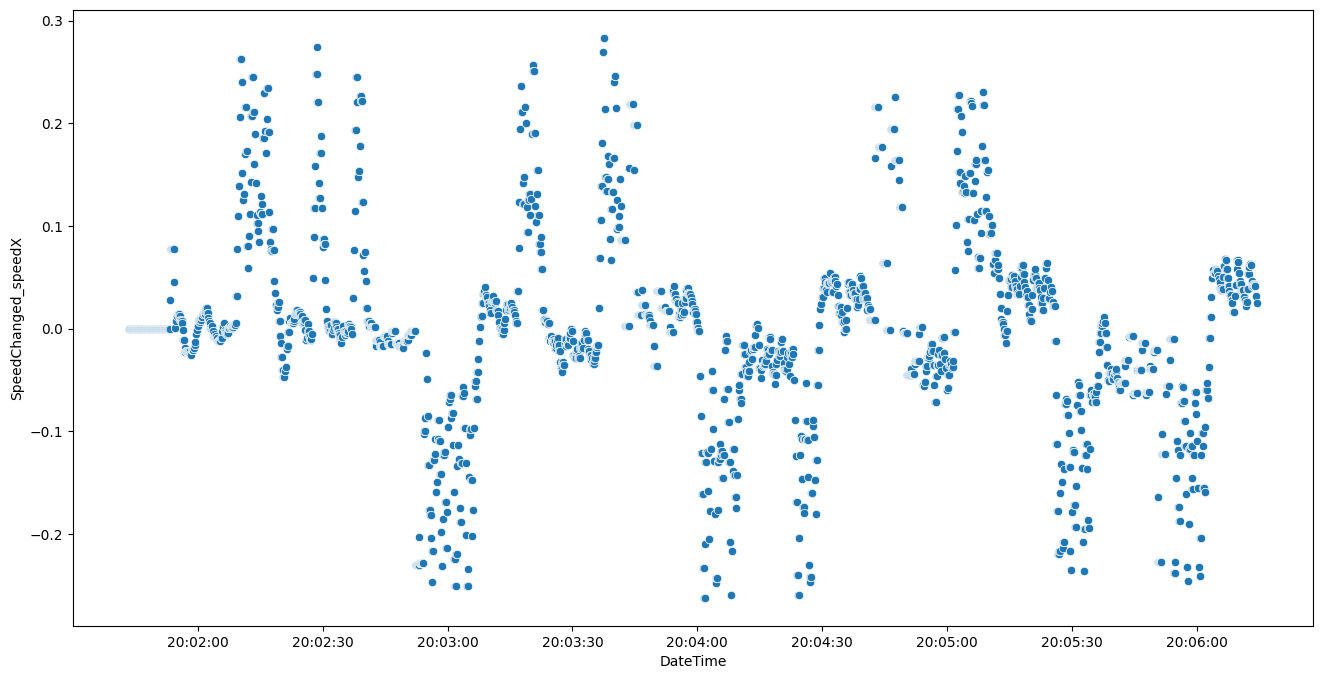

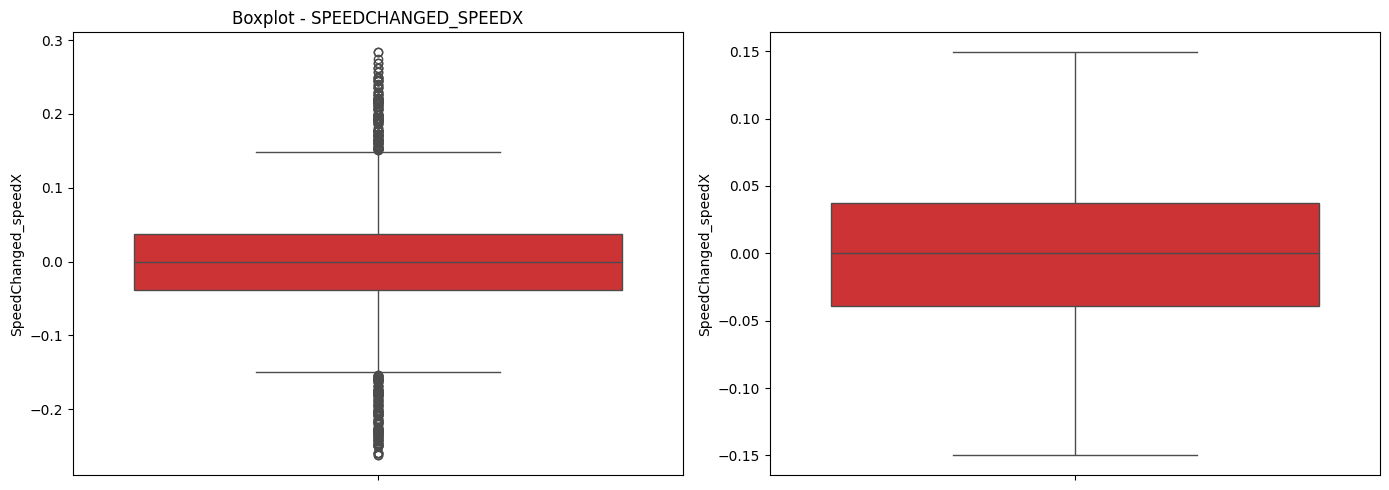

count   2624.00
mean      -0.00
std        0.09
min       -0.26
25%       -0.04
50%        0.00
75%        0.04
90%        0.12
95%        0.18
max        0.28
Name: SpeedChanged_speedX, dtype: float64

In [7]:
# SpeedChanged_speedX
show_scatterplot(flight_df, "DateTime", "SpeedChanged_speedX", category="")
show_boxplot(flight_df, "SpeedChanged_speedX", category="")

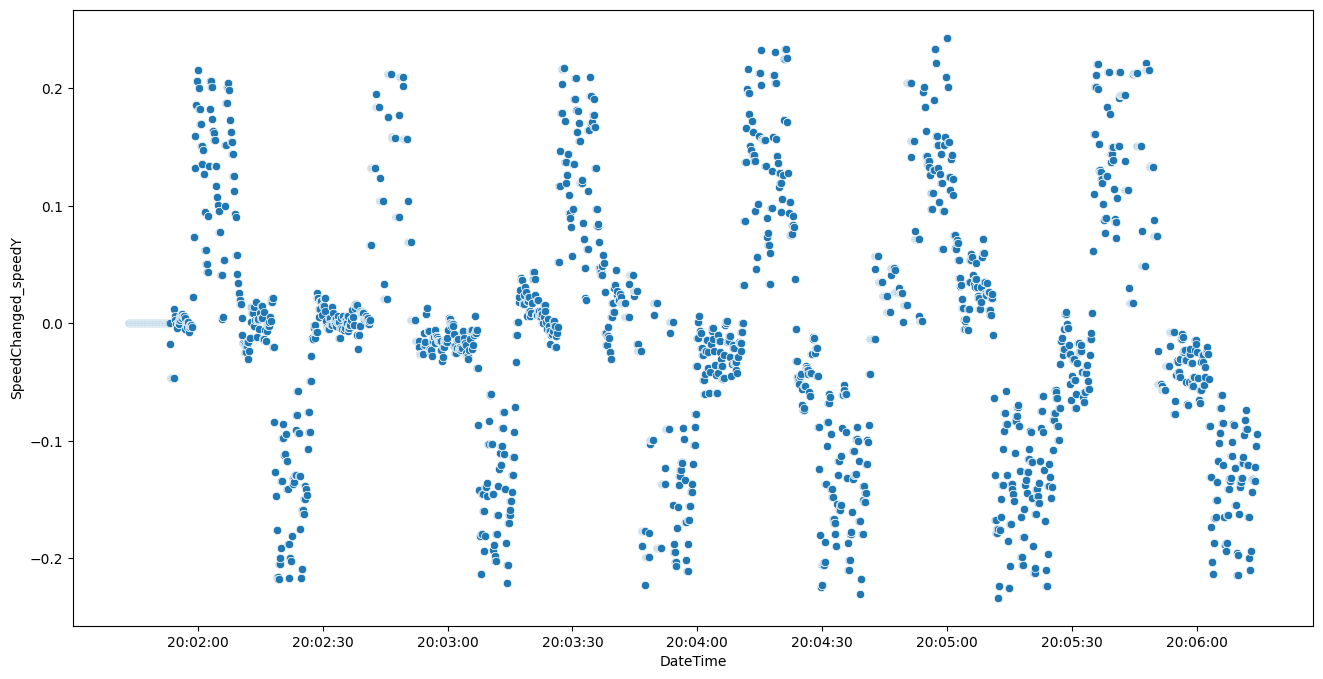

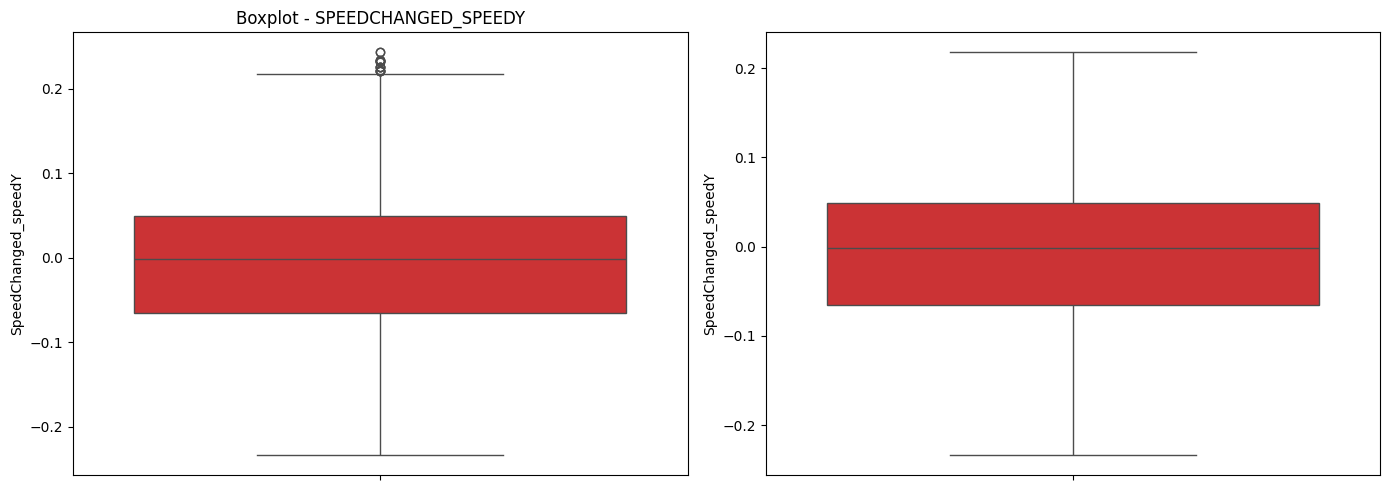

count   2624.00
mean      -0.00
std        0.11
min       -0.23
25%       -0.07
50%       -0.00
75%        0.05
90%        0.15
95%        0.19
max        0.24
Name: SpeedChanged_speedY, dtype: float64

In [8]:
# SpeedChanged_speedY
show_scatterplot(flight_df, "DateTime", "SpeedChanged_speedY", category="")
show_boxplot(flight_df, "SpeedChanged_speedY", category="")

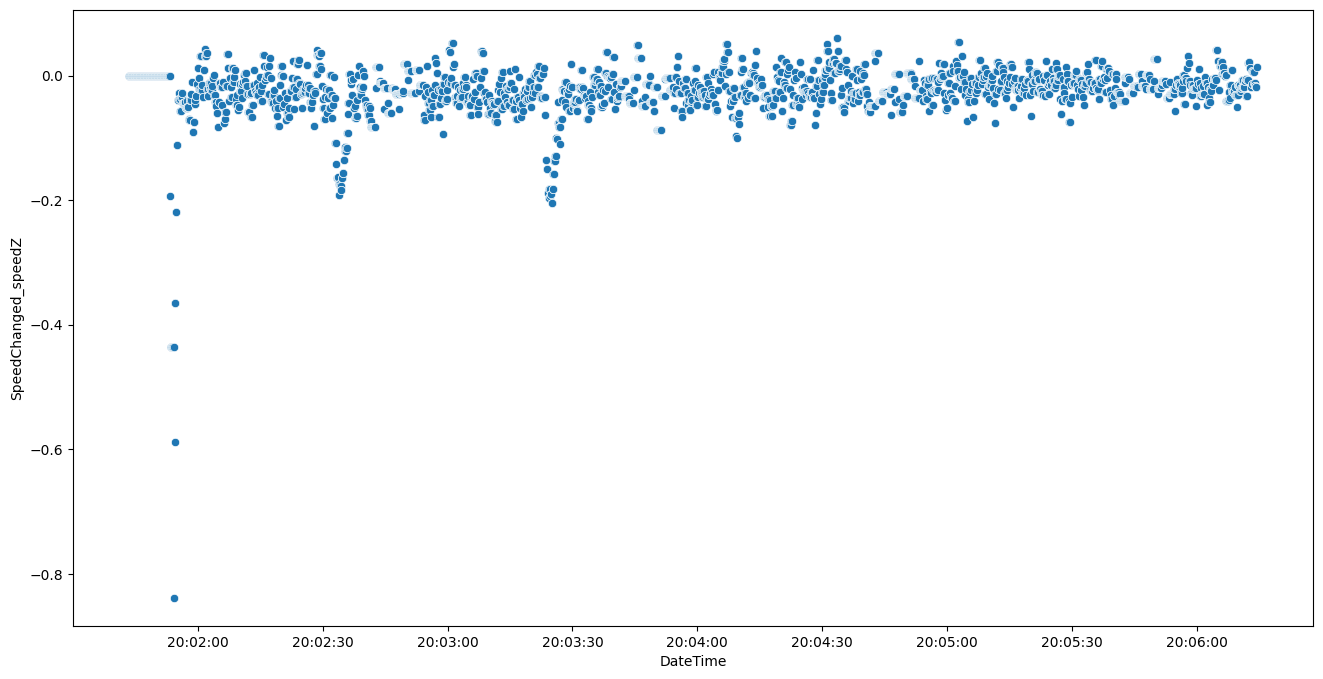

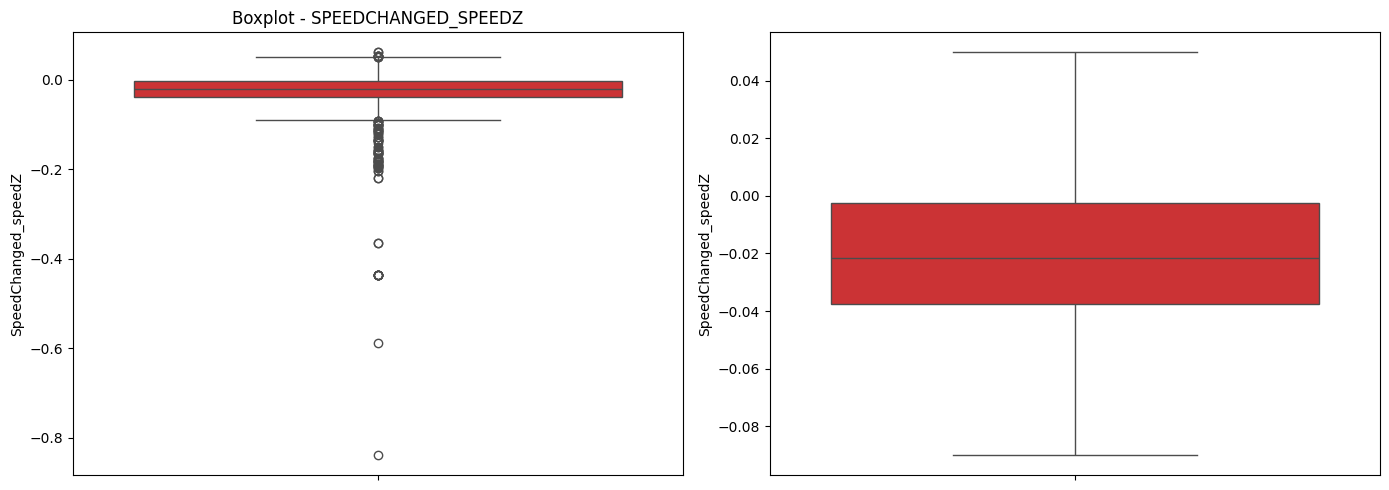

count   2624.00
mean      -0.03
std        0.05
min       -0.84
25%       -0.04
50%       -0.02
75%       -0.00
90%        0.01
95%        0.02
max        0.06
Name: SpeedChanged_speedZ, dtype: float64

In [9]:
# SpeedChanged_speedZ
show_scatterplot(flight_df, "DateTime", "SpeedChanged_speedZ", category="")
show_boxplot(flight_df, "SpeedChanged_speedZ", category="")

### 03.2. _AltitudeChanged_

Drone's altitude changed. The altitude reported is the altitude above the take off point. To get the altitude above sea level, see [GpsLocationChanged].

- _**AltitudeChanged_altitude**_: Altitude in meters.

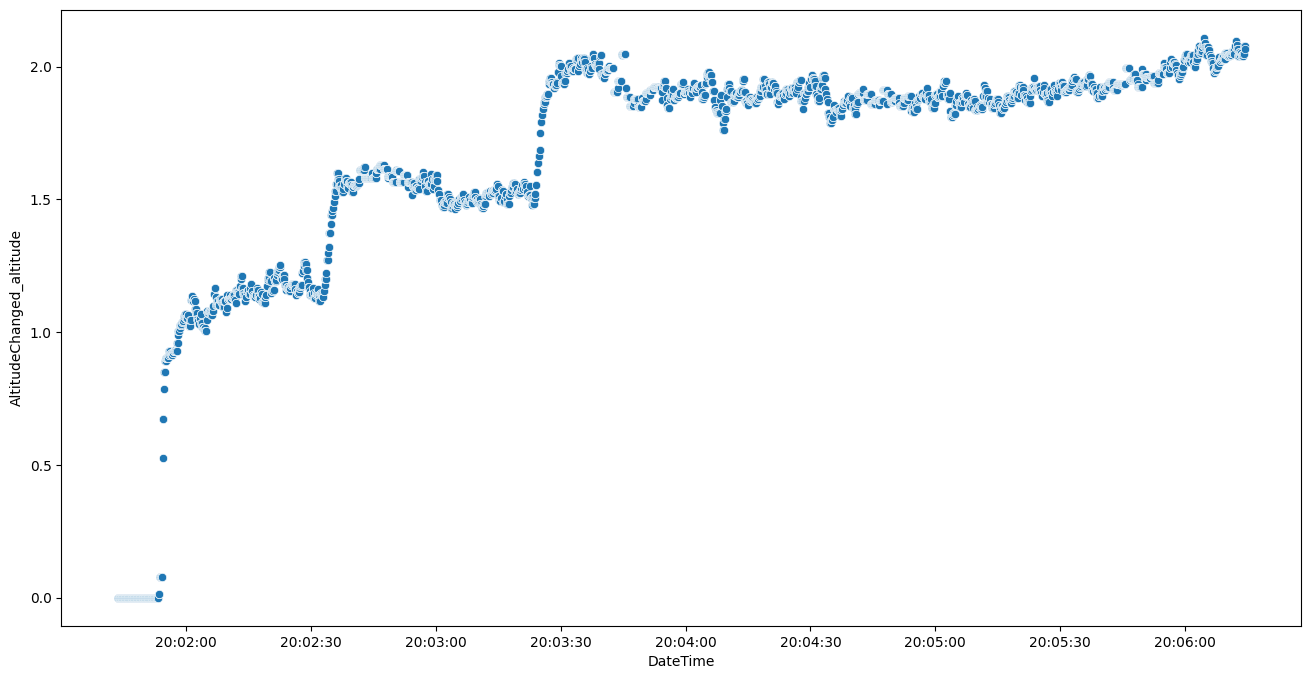

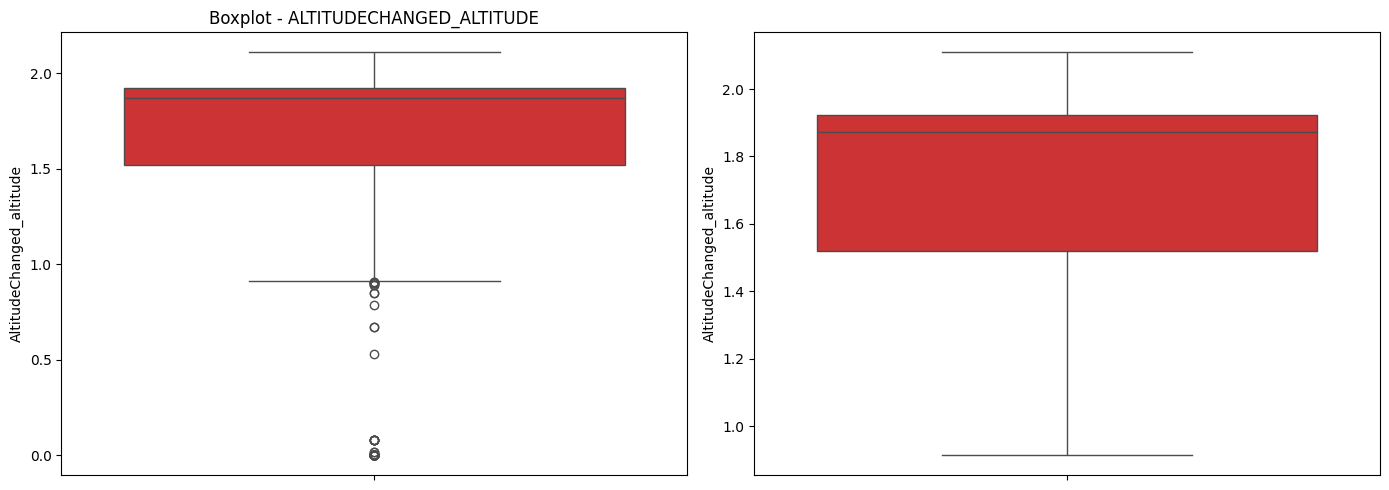

count   2624.00
mean       1.65
std        0.45
min        0.00
25%        1.52
50%        1.87
75%        1.92
90%        1.99
95%        2.03
max        2.11
Name: AltitudeChanged_altitude, dtype: float64

In [10]:
# AltitudeChanged_altitude
show_scatterplot(flight_df, "DateTime", "AltitudeChanged_altitude", category="")
show_boxplot(flight_df, "AltitudeChanged_altitude", category="")

### 03.3. _AttitudeChanged_

Drone's attitude changed.

- _**AttitudeChanged_roll**_: Roll value (in radian);
- _**AttitudeChanged_pitch**_: Pitch value (in radian);
- _**AttitudeChanged_yaw**_: Yaw value (in radian).

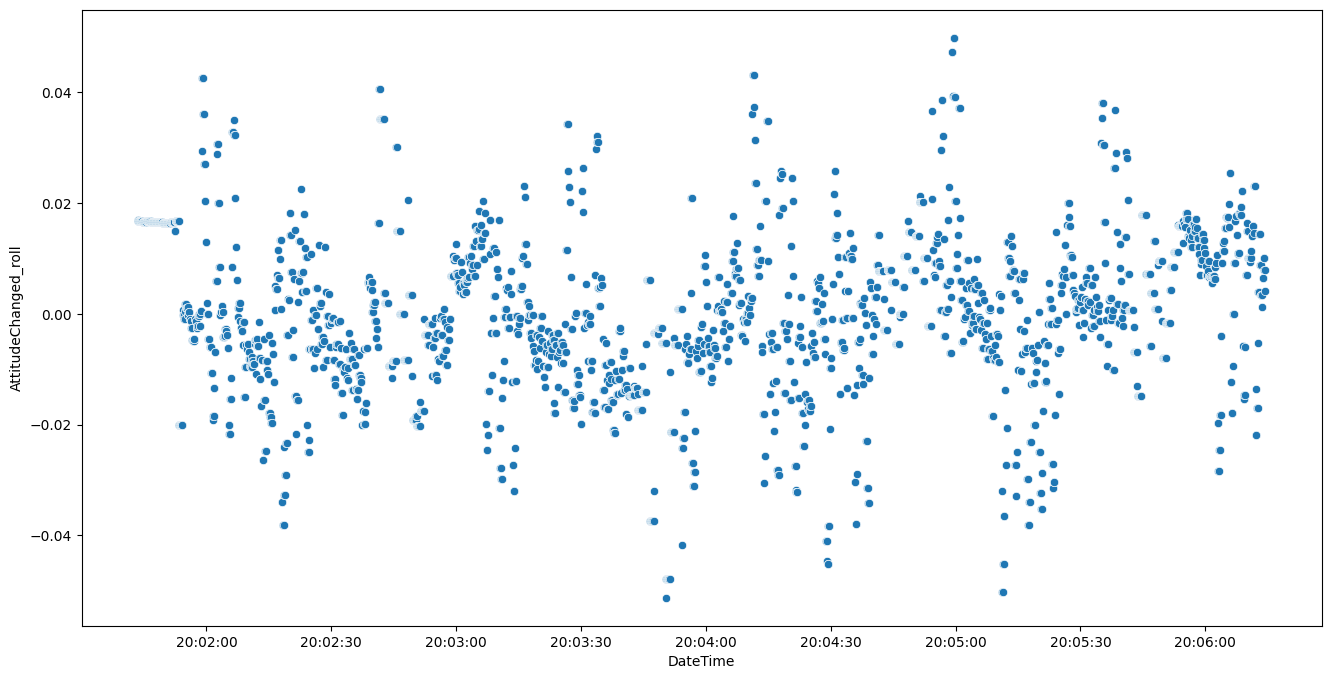

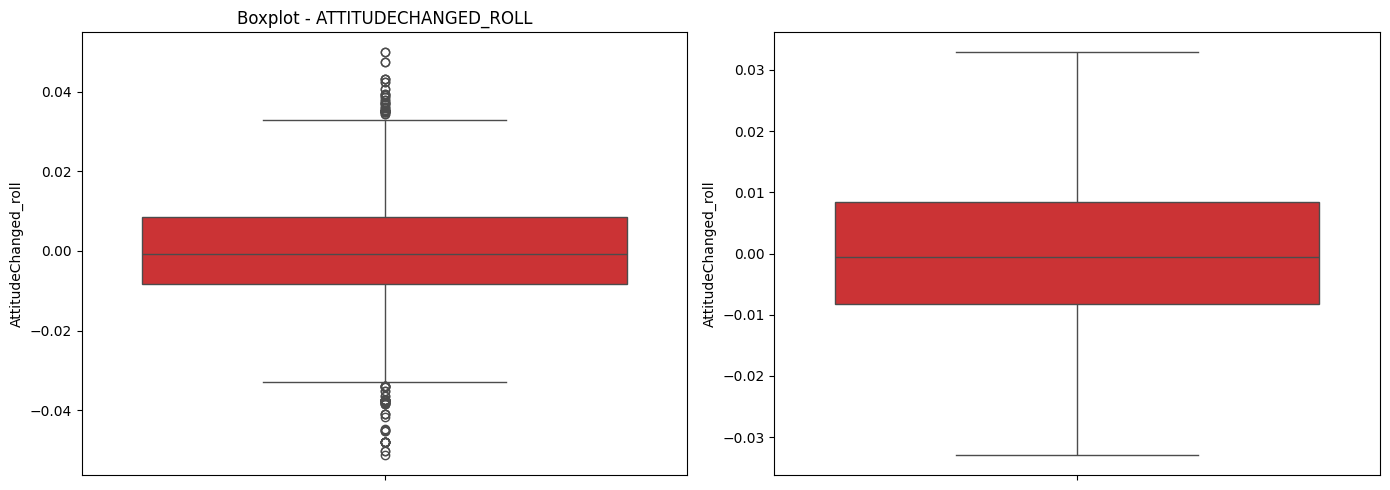

count   2624.00
mean      -0.00
std        0.01
min       -0.05
25%       -0.01
50%       -0.00
75%        0.01
90%        0.02
95%        0.02
max        0.05
Name: AttitudeChanged_roll, dtype: float64

In [11]:
# AttitudeChanged_roll
show_scatterplot(flight_df, "DateTime", "AttitudeChanged_roll", category="")
show_boxplot(flight_df, "AttitudeChanged_roll", category="")

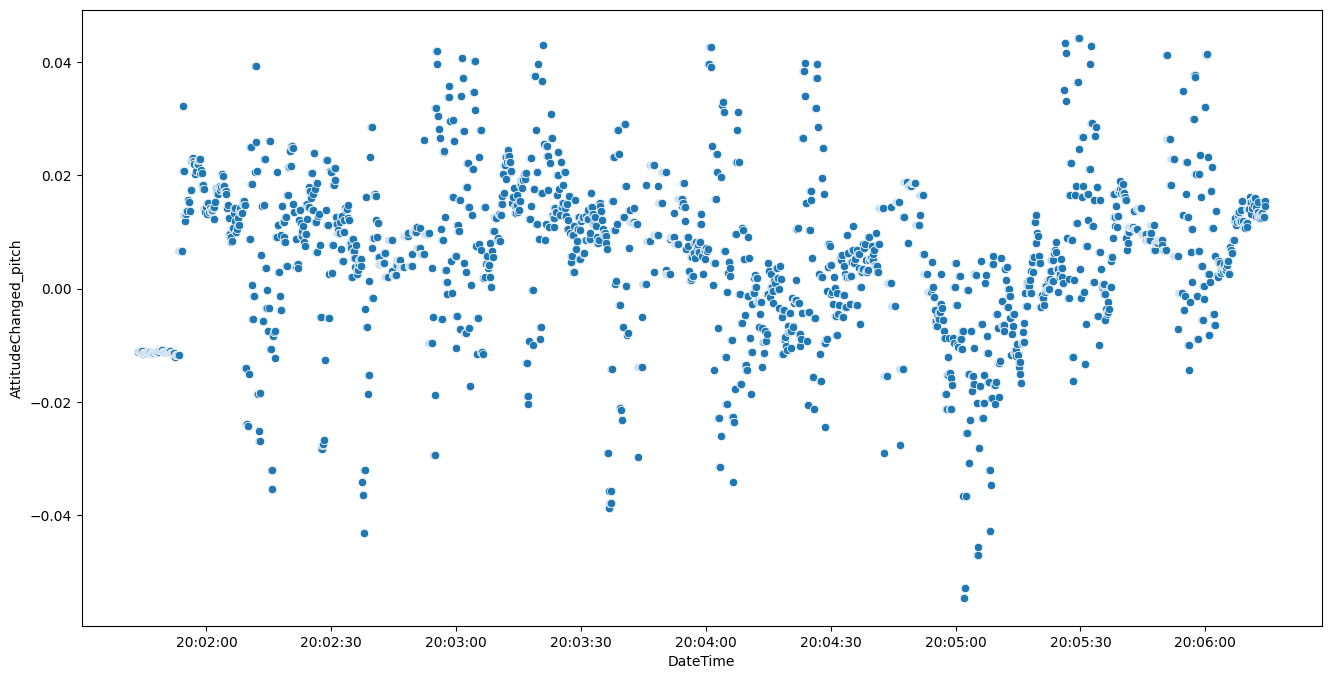

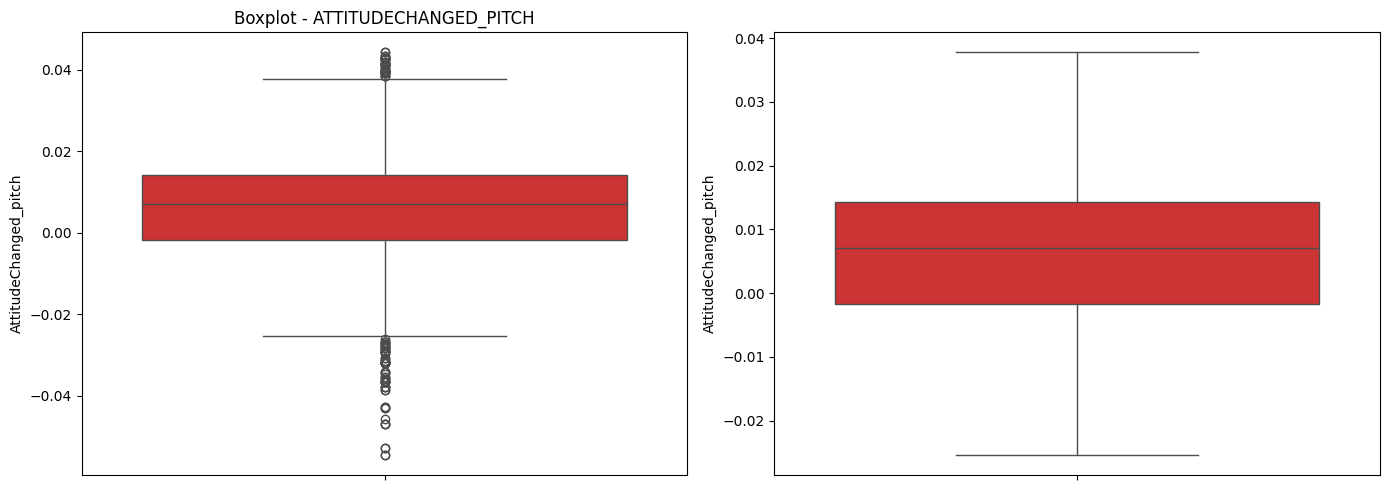

count   2624.00
mean       0.01
std        0.01
min       -0.05
25%       -0.00
50%        0.01
75%        0.01
90%        0.02
95%        0.03
max        0.04
Name: AttitudeChanged_pitch, dtype: float64

In [12]:
# AttitudeChanged_pitch
show_scatterplot(flight_df, "DateTime", "AttitudeChanged_pitch", category="")
show_boxplot(flight_df, "AttitudeChanged_pitch", category="")

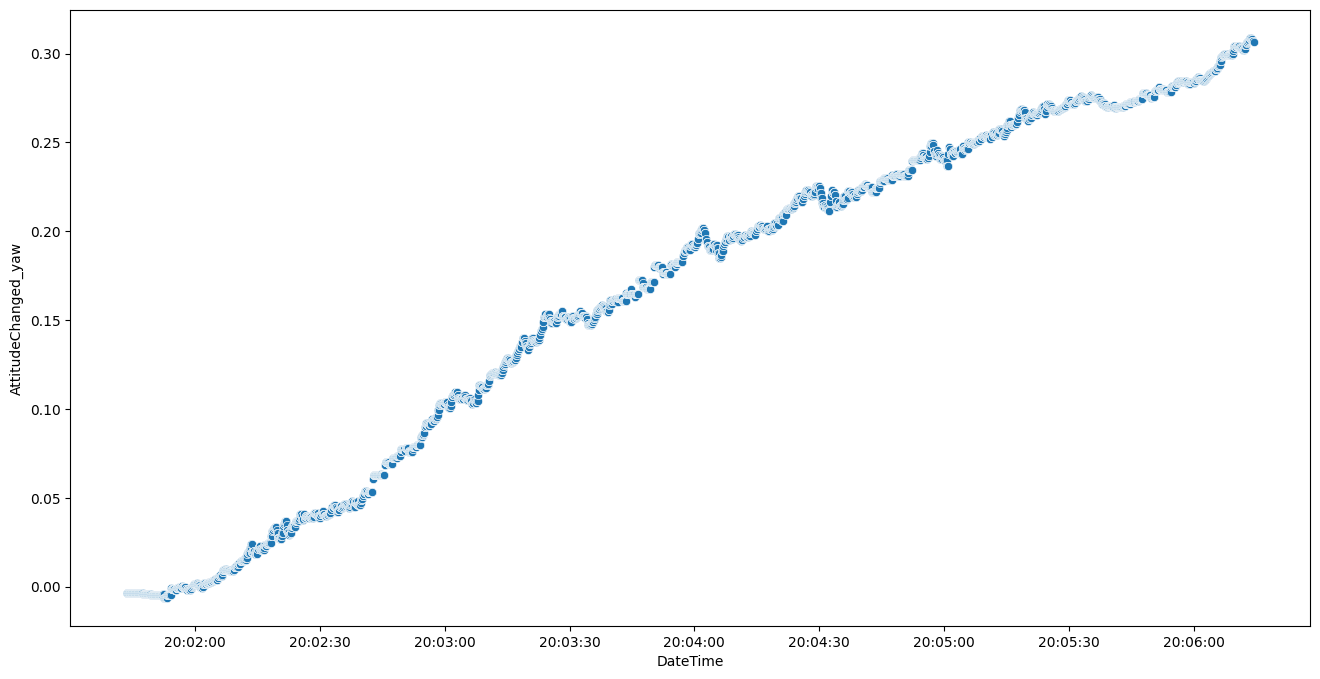

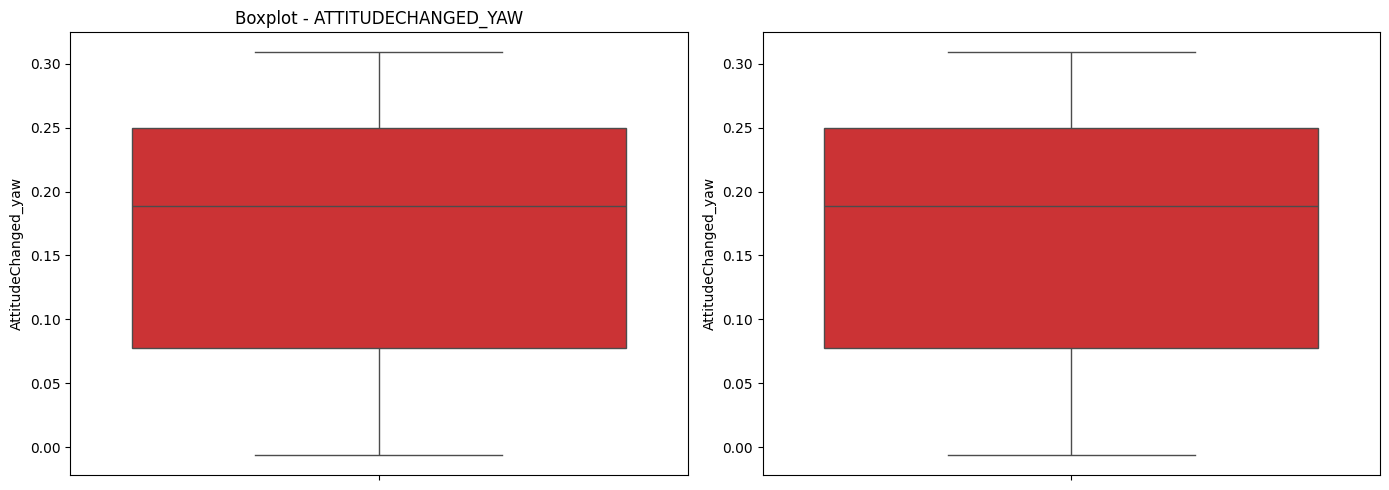

count   2624.00
mean       0.16
std        0.10
min       -0.01
25%        0.08
50%        0.19
75%        0.25
90%        0.28
95%        0.29
max        0.31
Name: AttitudeChanged_yaw, dtype: float64

In [13]:
# AttitudeChanged_yaw
show_scatterplot(flight_df, "DateTime", "AttitudeChanged_yaw", category="")
show_boxplot(flight_df, "AttitudeChanged_yaw", category="")

### 03.4. _GpsLocationChanged_

Drone's location changed. This event is meant to replace [PositionChanged].

- _**GpsLocationChanged_latitude**_: Latitude location in decimal degrees (500.0 if not available);
- _**GpsLocationChanged_longitude**_: Longitude location in decimal degrees (500.0 if not available);
- _**GpsLocationChanged_altitude**_: Altitude location in meters;
- _**GpsLocationChanged_latitude_accuracy**_: Latitude location error in meters (1 sigma/standard deviation) [-1 if not available];
- _**GpsLocationChanged_longitude_accuracy**_: Longitude location error in meters (1 sigma/standard deviation) [-1 if not available];
- _**GpsLocationChanged_altitude_accuracy**_: Altitude location error in meters (1 sigma/standard deviation) [-1 if not available].

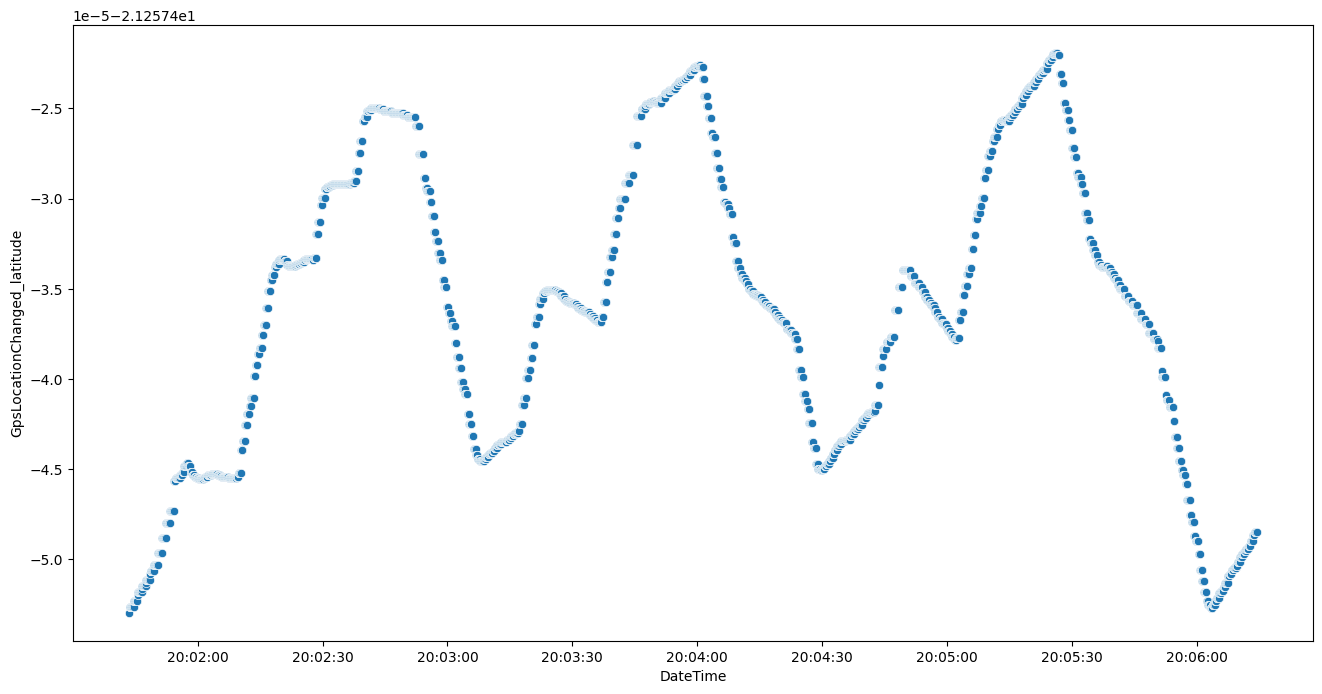

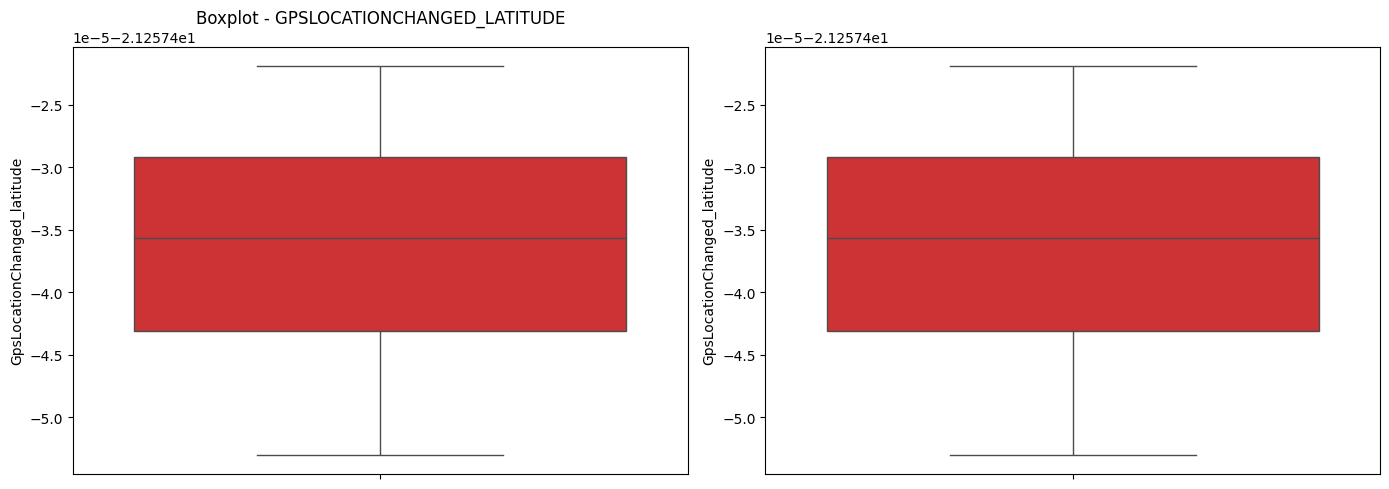

count   2624.00
mean     -21.26
std        0.00
min      -21.26
25%      -21.26
50%      -21.26
75%      -21.26
90%      -21.26
95%      -21.26
max      -21.26
Name: GpsLocationChanged_latitude, dtype: float64

In [14]:
# GpsLocationChanged_latitude
show_scatterplot(flight_df, "DateTime", "GpsLocationChanged_latitude", category="")
show_boxplot(flight_df, "GpsLocationChanged_latitude", category="")

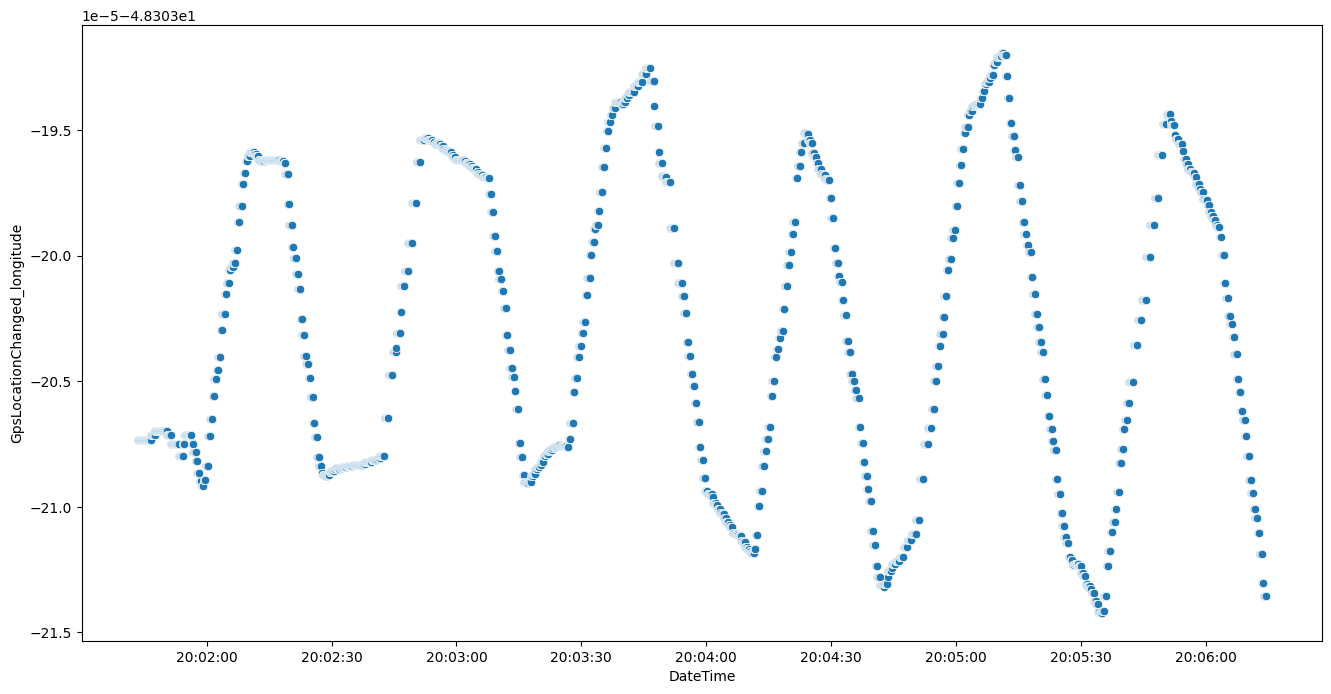

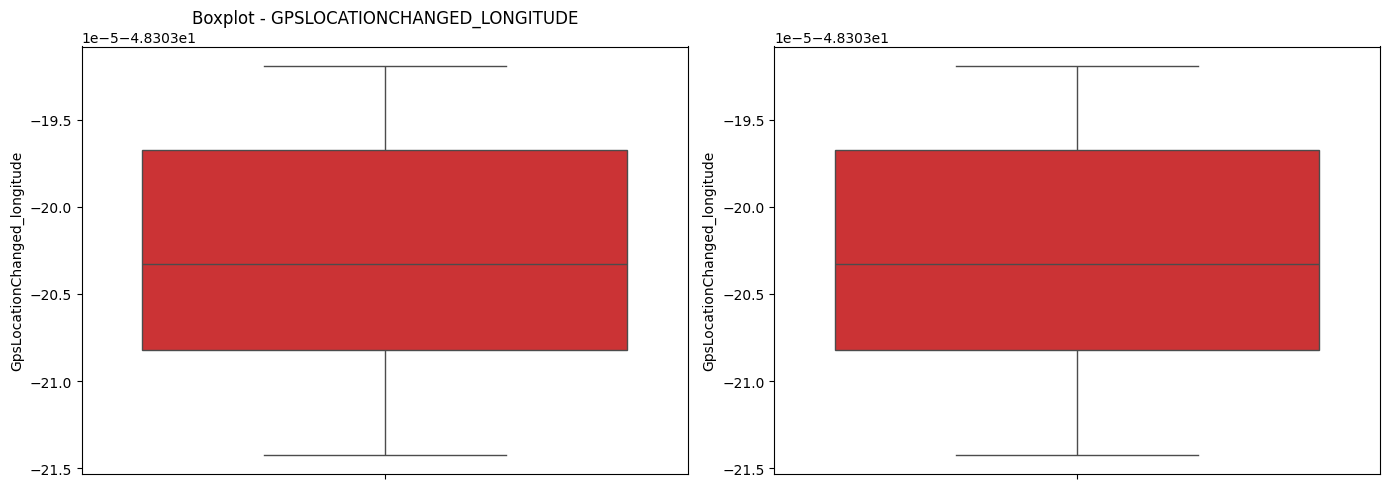

count   2624.00
mean     -48.30
std        0.00
min      -48.30
25%      -48.30
50%      -48.30
75%      -48.30
90%      -48.30
95%      -48.30
max      -48.30
Name: GpsLocationChanged_longitude, dtype: float64

In [15]:
# GpsLocationChanged_longitude
show_scatterplot(flight_df, "DateTime", "GpsLocationChanged_longitude", category="")
show_boxplot(flight_df, "GpsLocationChanged_longitude", category="")

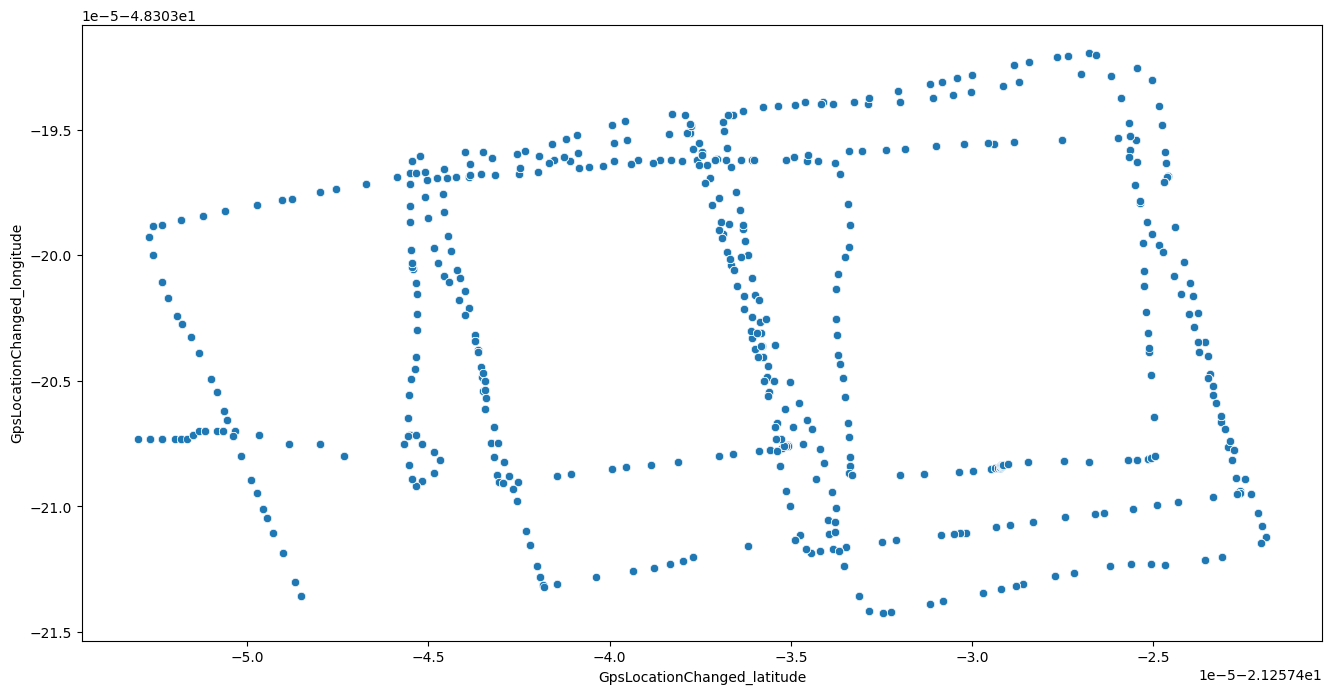

In [16]:
# Plot latitude x longitude of a normal flight
show_scatterplot(flight_df, "GpsLocationChanged_latitude", "GpsLocationChanged_longitude", category="")

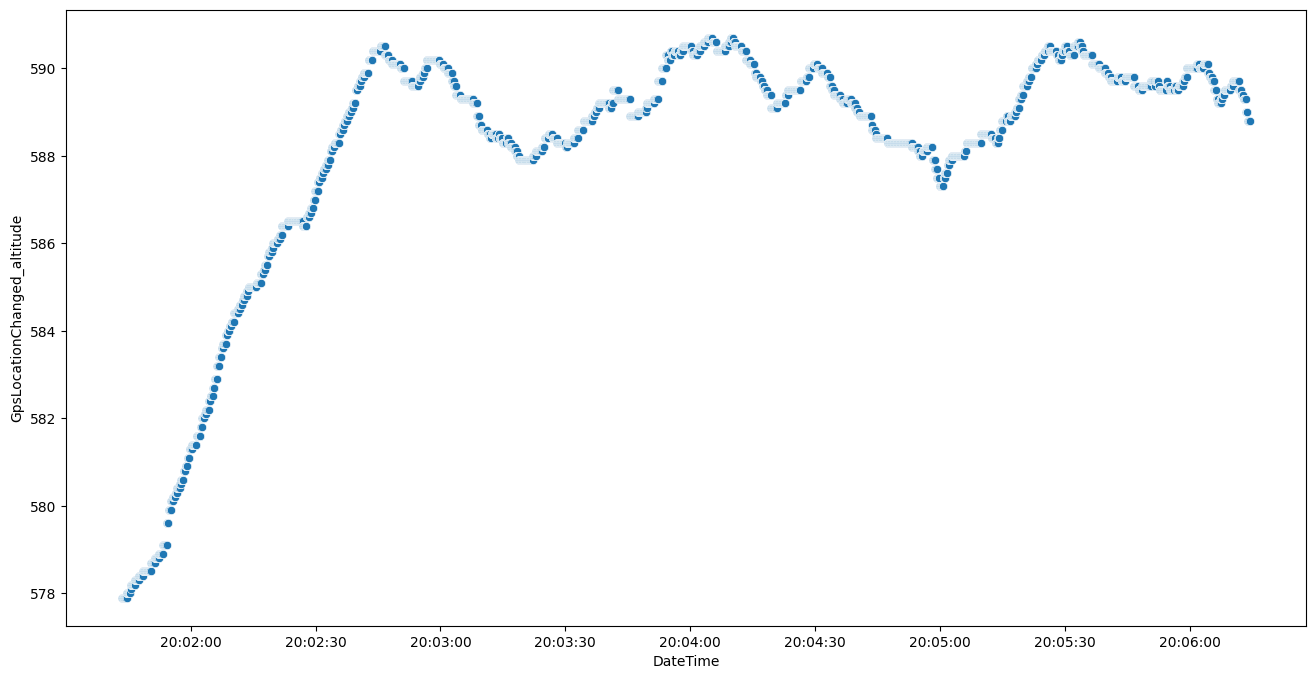

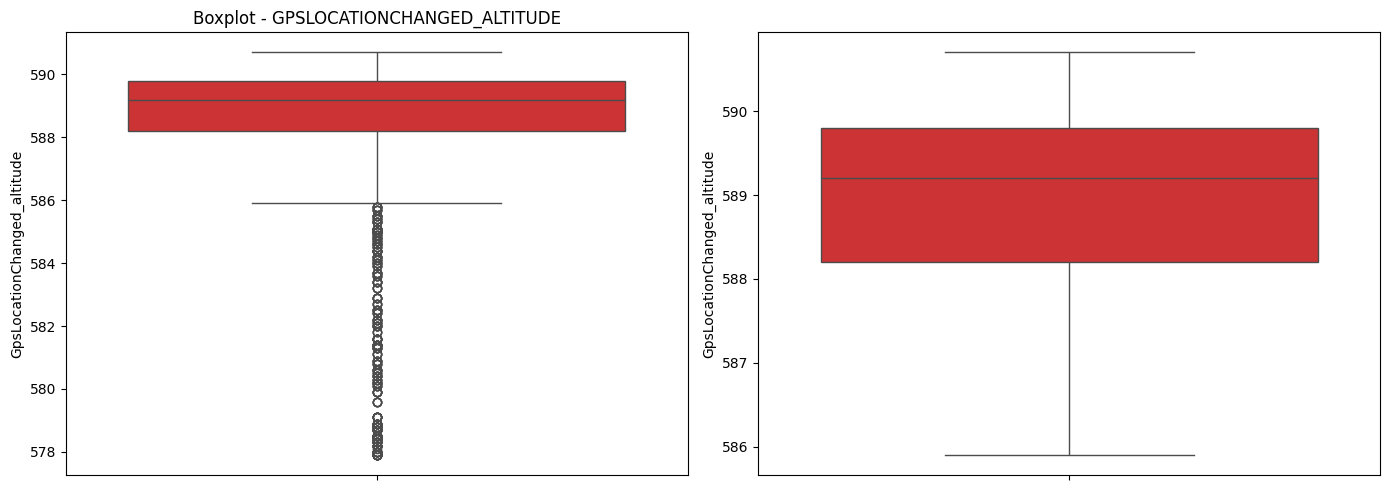

count   2624.00
mean     588.18
std        2.88
min      577.90
25%      588.20
50%      589.20
75%      589.80
90%      590.30
95%      590.50
max      590.70
Name: GpsLocationChanged_altitude, dtype: float64

In [17]:
# GpsLocationChanged_altitude
show_scatterplot(flight_df, "DateTime", "GpsLocationChanged_altitude", category="")
show_boxplot(flight_df, "GpsLocationChanged_altitude", category="")

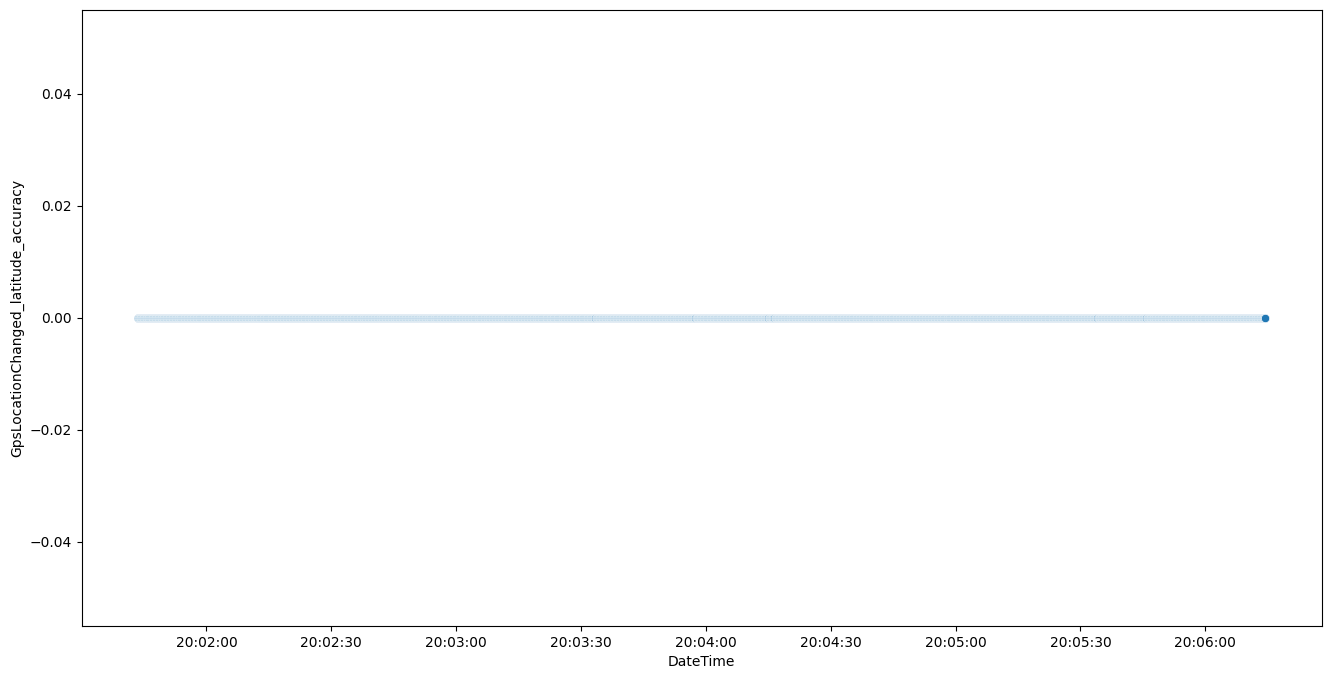

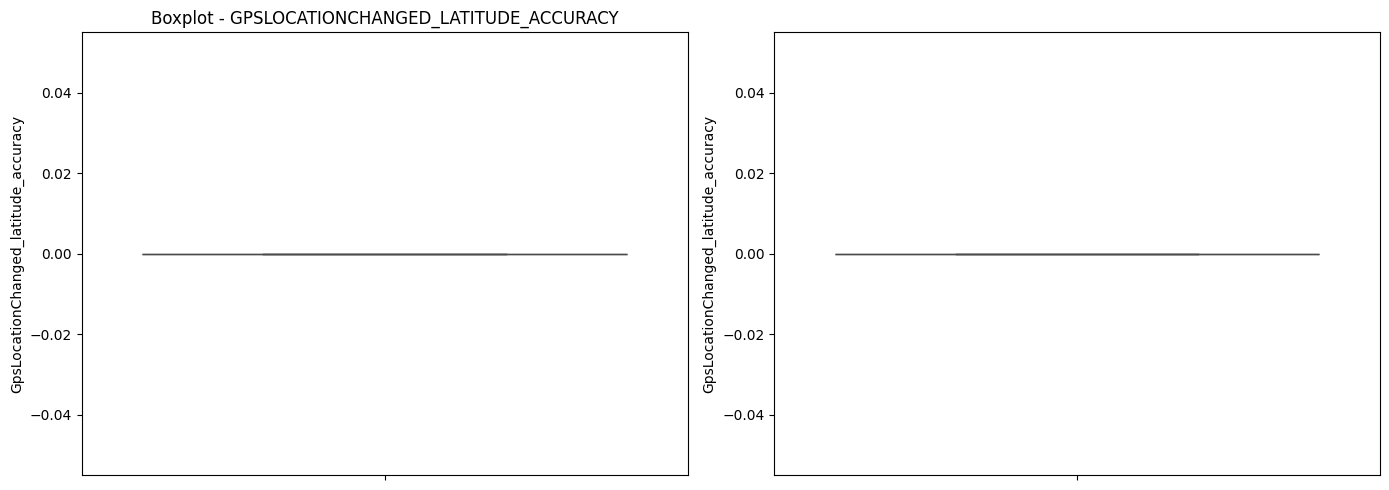

count   2624.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
90%        0.00
95%        0.00
max        0.00
Name: GpsLocationChanged_latitude_accuracy, dtype: float64

In [18]:
# GpsLocationChanged_latitude_accuracy
show_scatterplot(flight_df, "DateTime", "GpsLocationChanged_latitude_accuracy", category="")
show_boxplot(flight_df, "GpsLocationChanged_latitude_accuracy", category="")

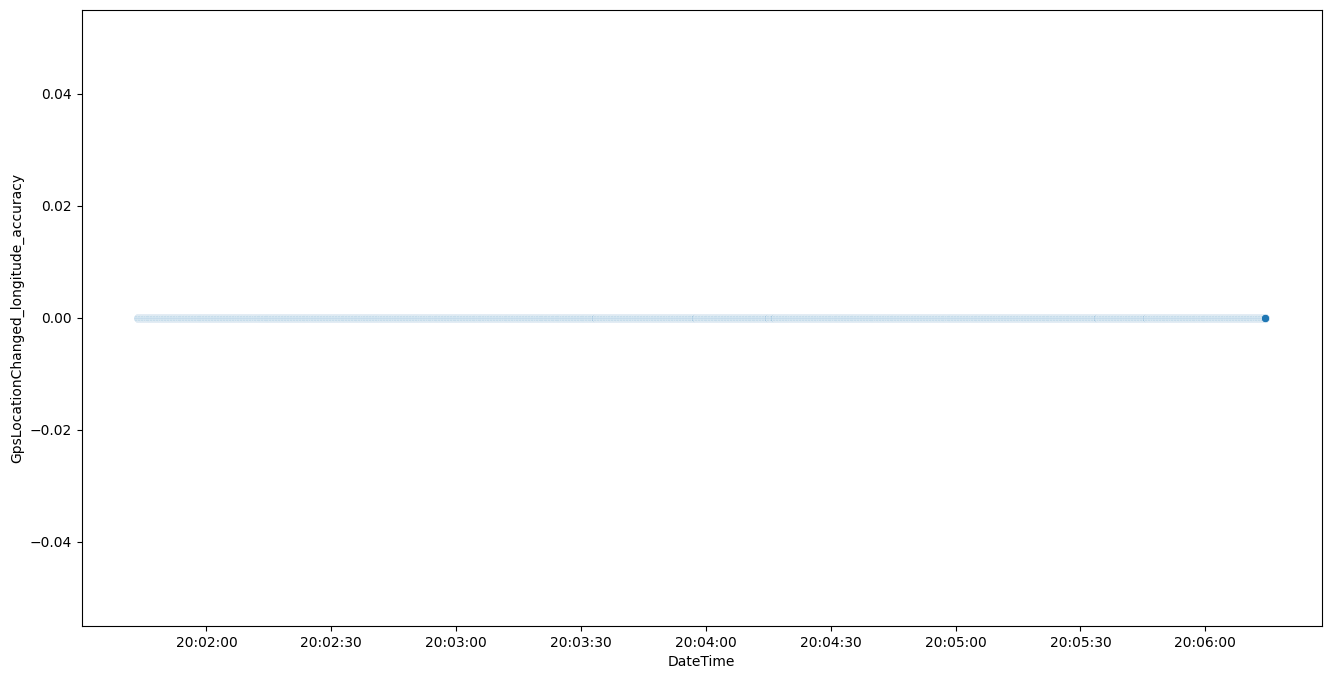

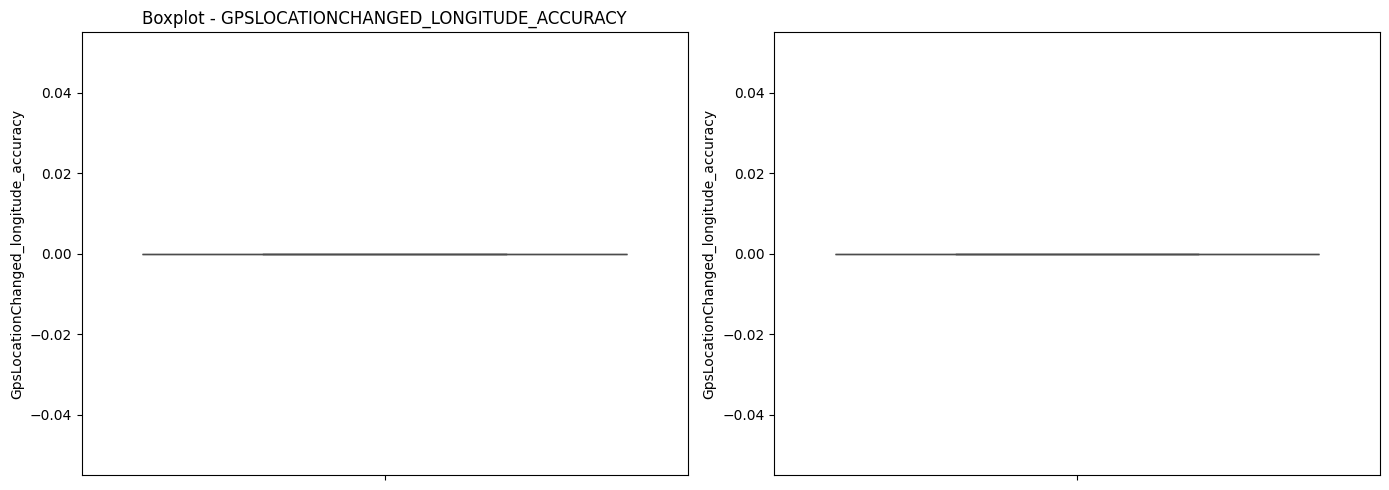

count   2624.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
90%        0.00
95%        0.00
max        0.00
Name: GpsLocationChanged_longitude_accuracy, dtype: float64

In [19]:
# GpsLocationChanged_longitude_accuracy
show_scatterplot(flight_df, "DateTime", "GpsLocationChanged_longitude_accuracy", category="")
show_boxplot(flight_df, "GpsLocationChanged_longitude_accuracy", category="")

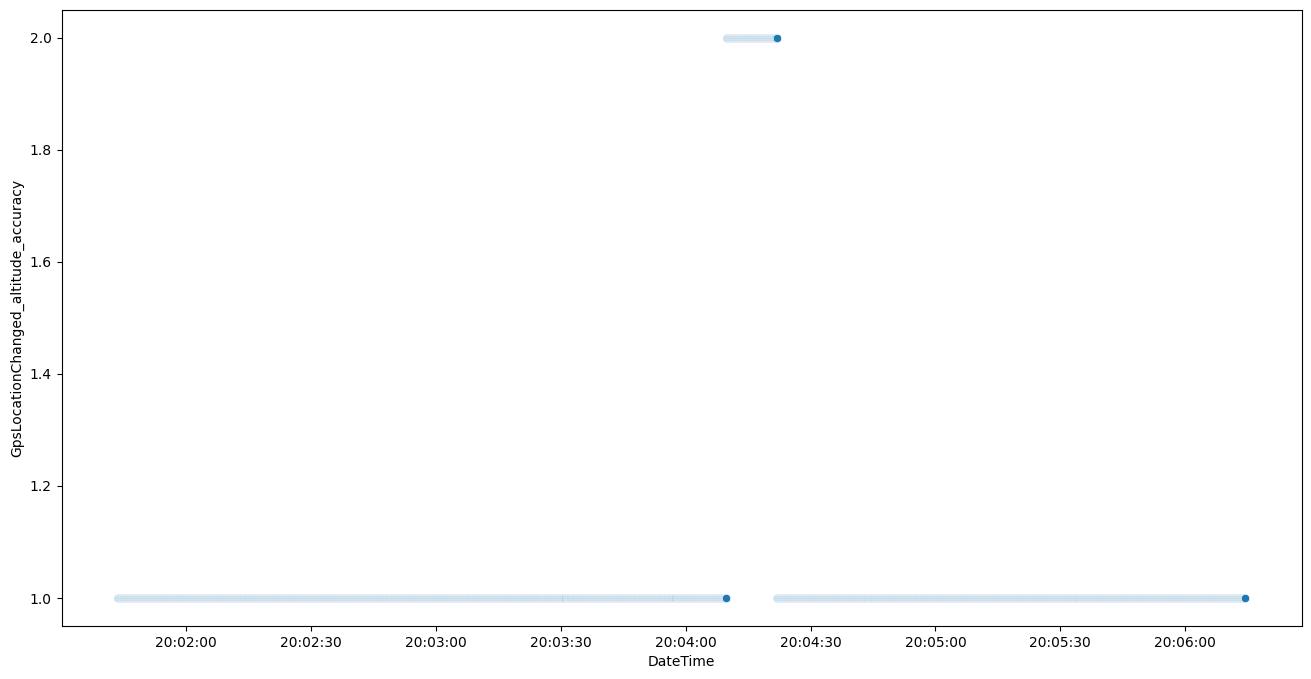

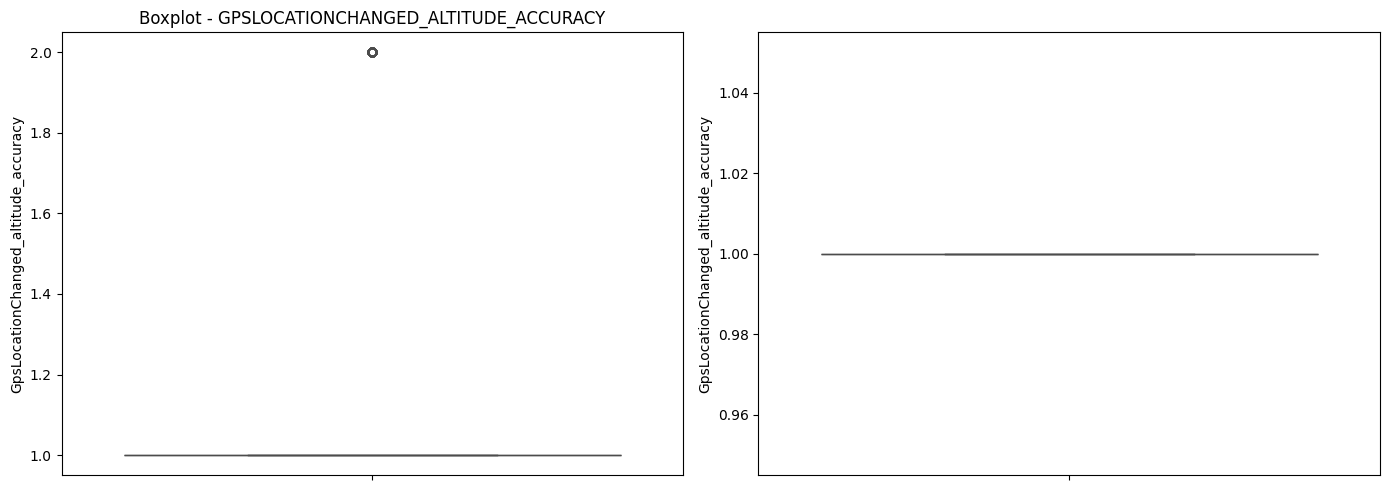

count   2624.00
mean       1.04
std        0.21
min        1.00
25%        1.00
50%        1.00
75%        1.00
90%        1.00
95%        1.00
max        2.00
Name: GpsLocationChanged_altitude_accuracy, dtype: float64

In [20]:
# GpsLocationChanged_altitude_accuracy
show_scatterplot(flight_df, "DateTime", "GpsLocationChanged_altitude_accuracy", category="")
show_boxplot(flight_df, "GpsLocationChanged_altitude_accuracy", category="")

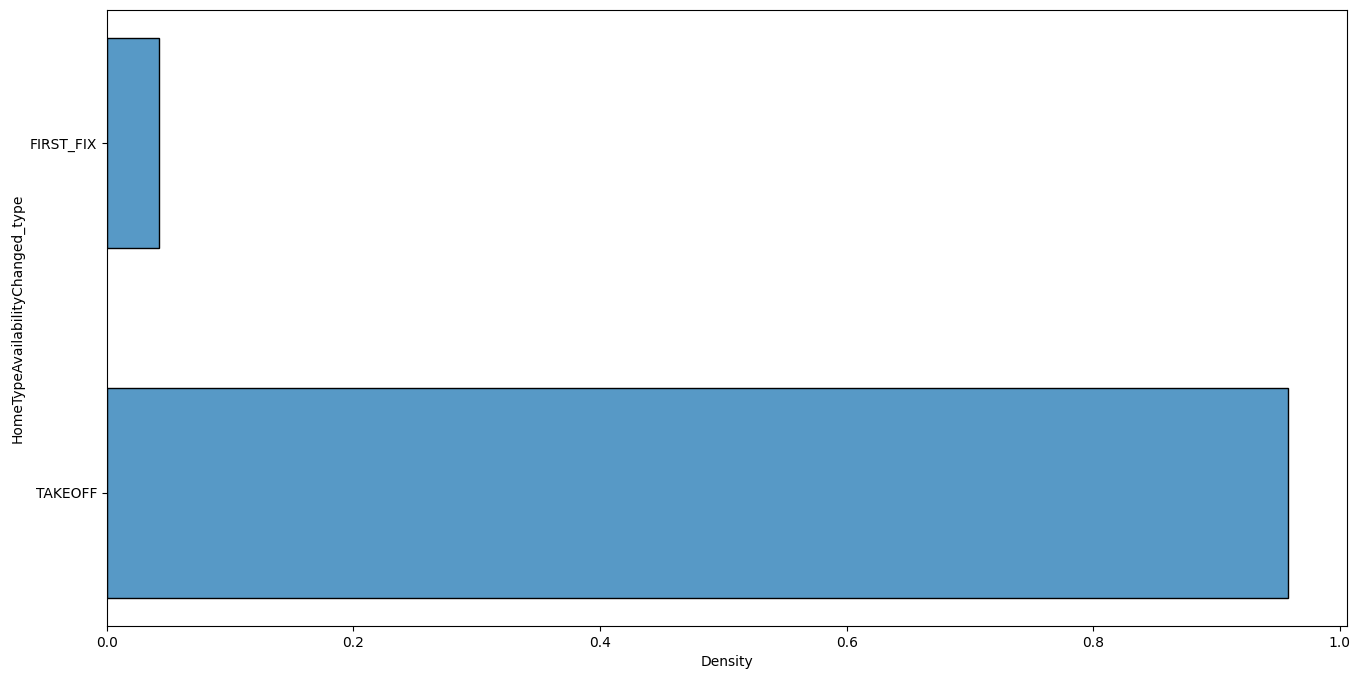

count        2624
unique          2
top       TAKEOFF
freq         2513
Name: HomeTypeAvailabilityChanged_type, dtype: object

In [21]:
# HomeTypeAvailabilityChanged_type
show_histogram(flight_df, "HomeTypeAvailabilityChanged_type", orient_h=False, describe=True, category="")

### 03.5. _HomeChanged_

Home location. 

- _**HomeChanged_latitude**_: Home latitude in decimal degrees;
- _**HomeChanged_longitude**_: Home longitude in decimal degrees;
- _**HomeChanged_altitude**_: Home altitude in meters.

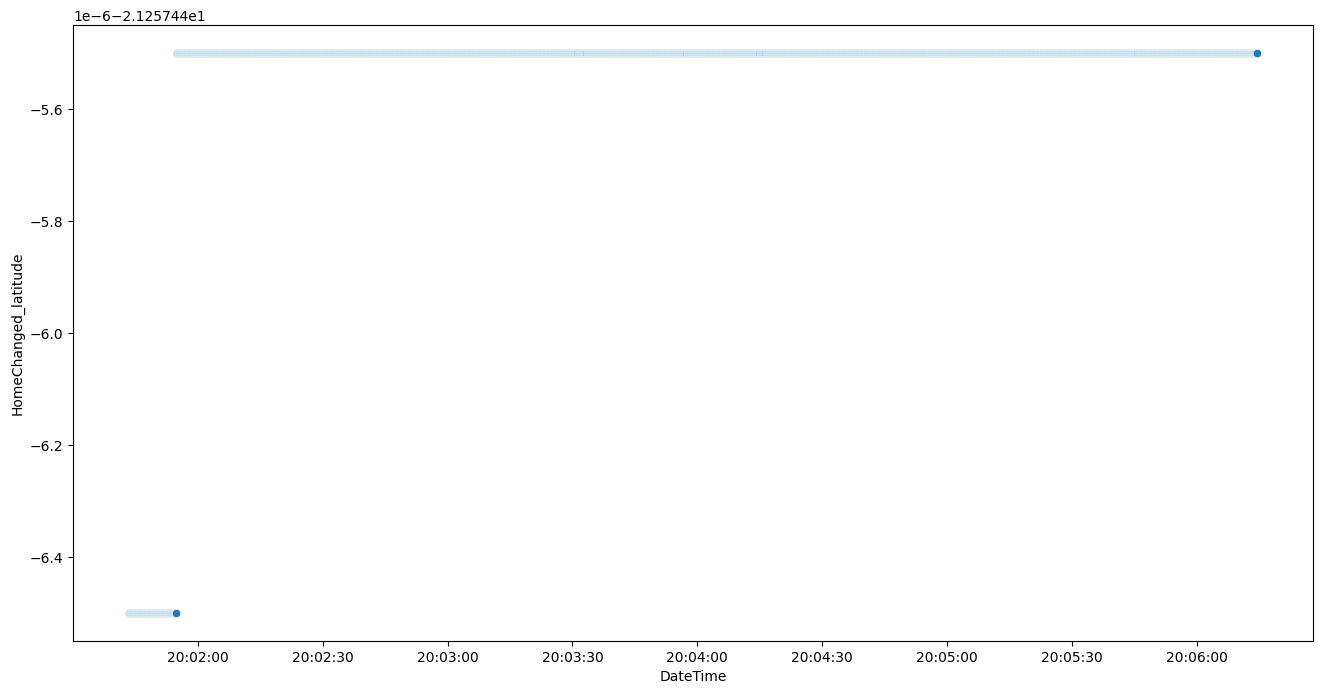

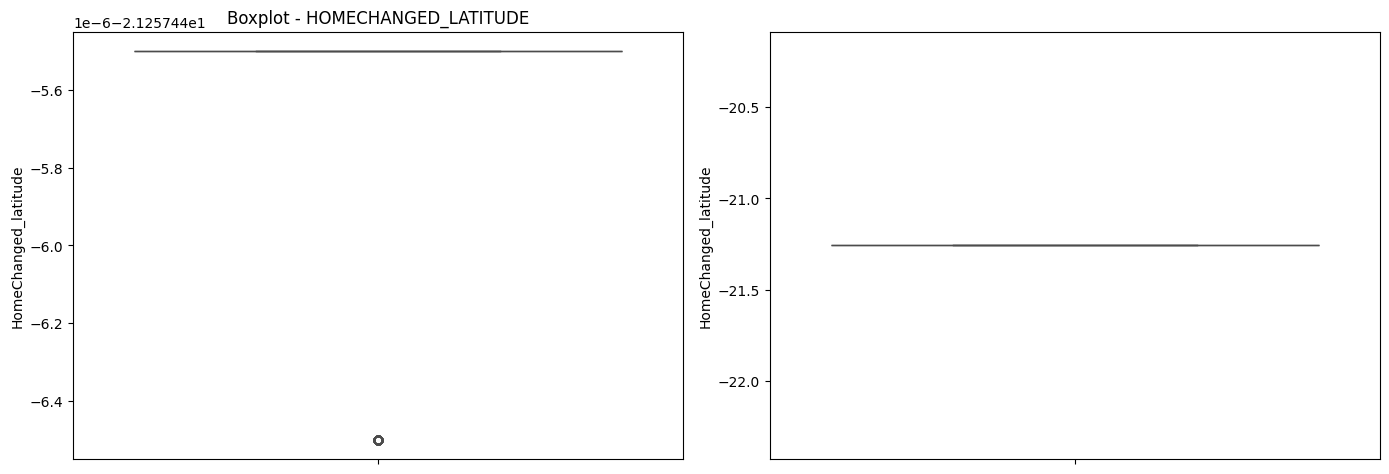

count   2624.00
mean     -21.26
std        0.00
min      -21.26
25%      -21.26
50%      -21.26
75%      -21.26
90%      -21.26
95%      -21.26
max      -21.26
Name: HomeChanged_latitude, dtype: float64

In [22]:
# HomeChanged_latitude
show_scatterplot(flight_df, "DateTime", "HomeChanged_latitude", category="")
show_boxplot(flight_df, "HomeChanged_latitude", category="")

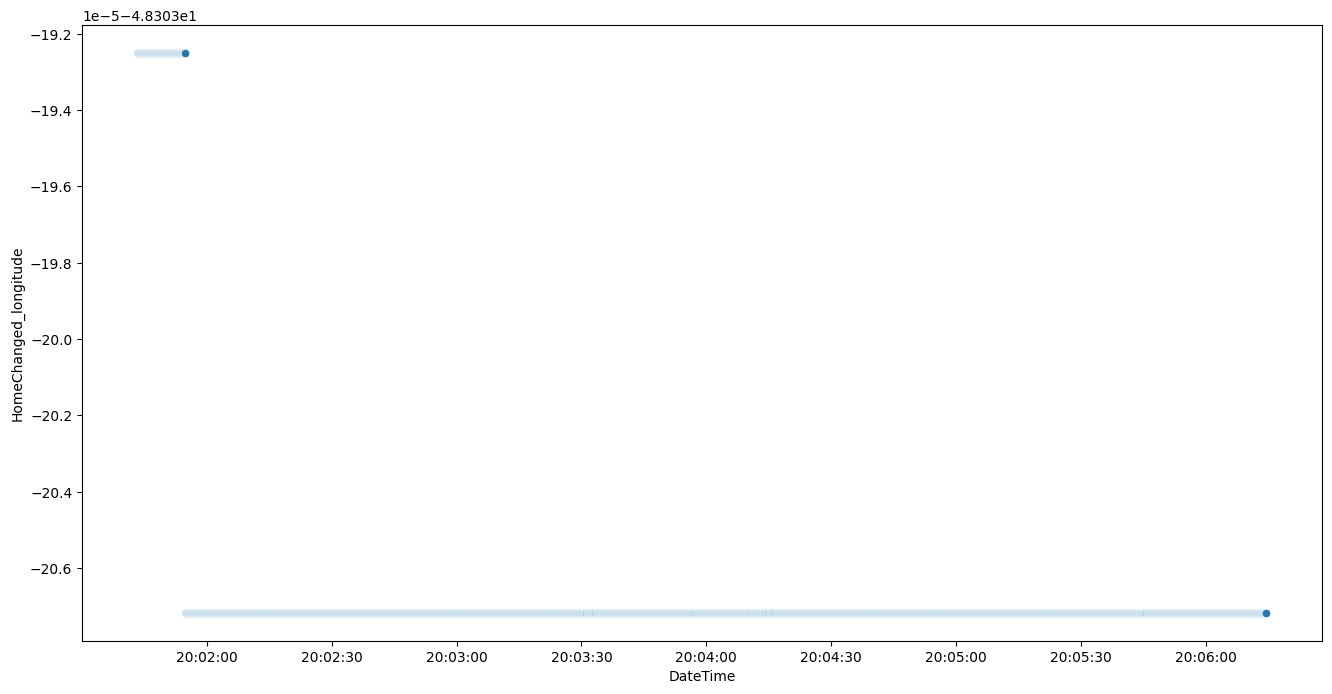

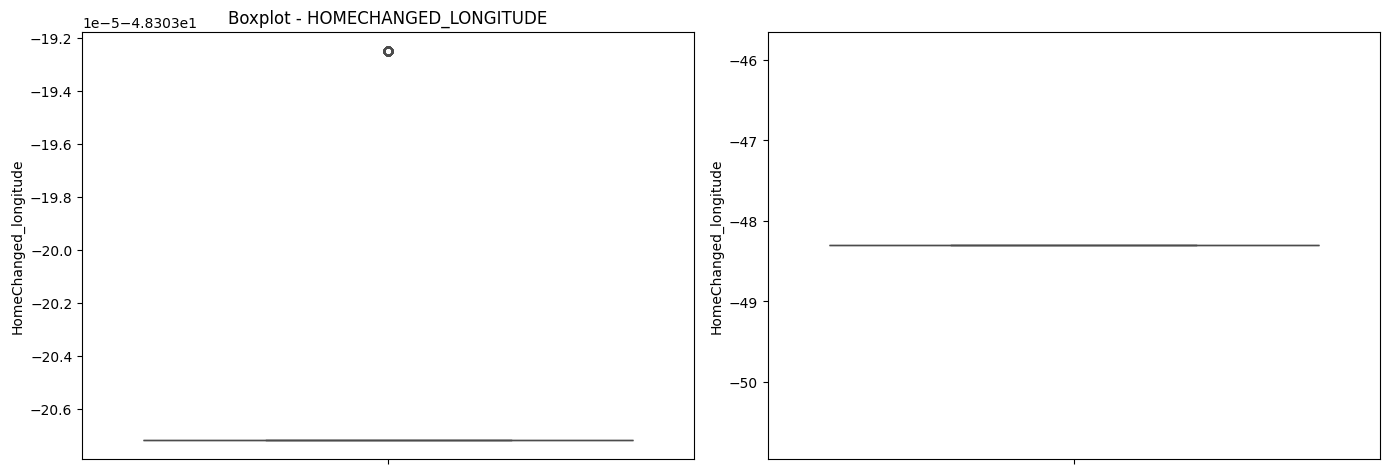

count   2624.00
mean     -48.30
std        0.00
min      -48.30
25%      -48.30
50%      -48.30
75%      -48.30
90%      -48.30
95%      -48.30
max      -48.30
Name: HomeChanged_longitude, dtype: float64

In [23]:
# HomeChanged_longitude
show_scatterplot(flight_df, "DateTime", "HomeChanged_longitude", category="")
show_boxplot(flight_df, "HomeChanged_longitude", category="")

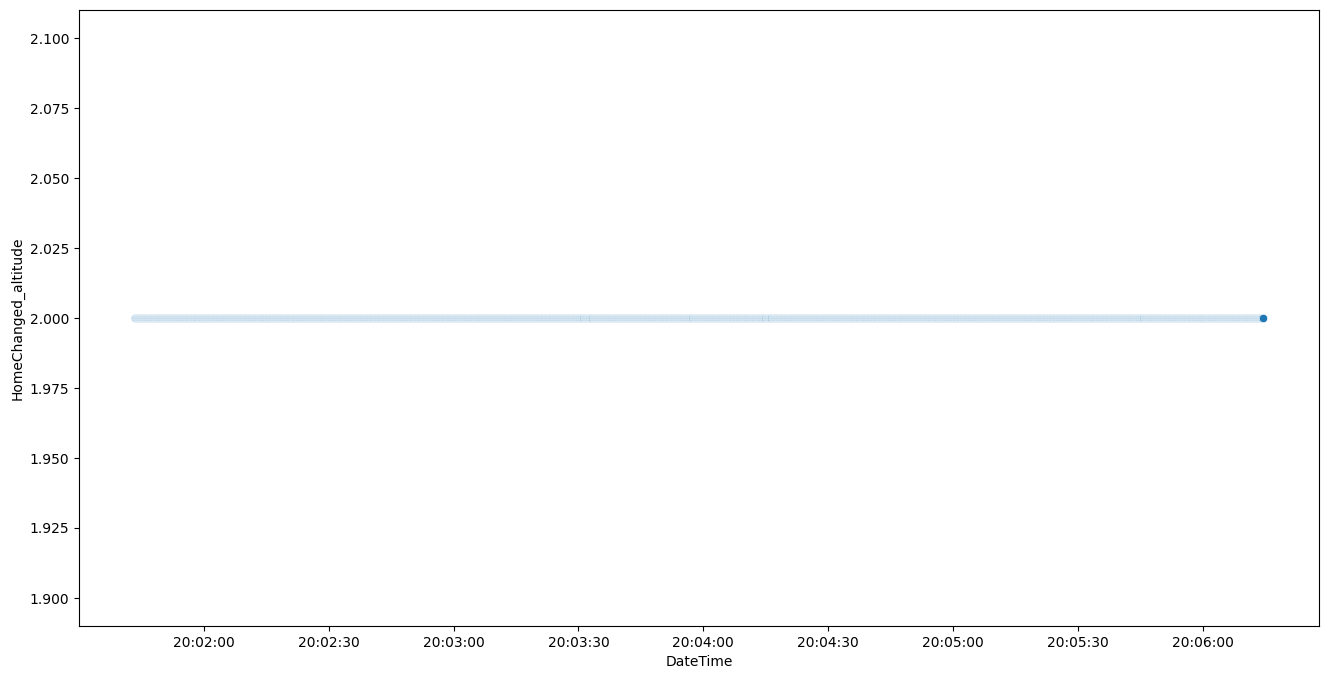

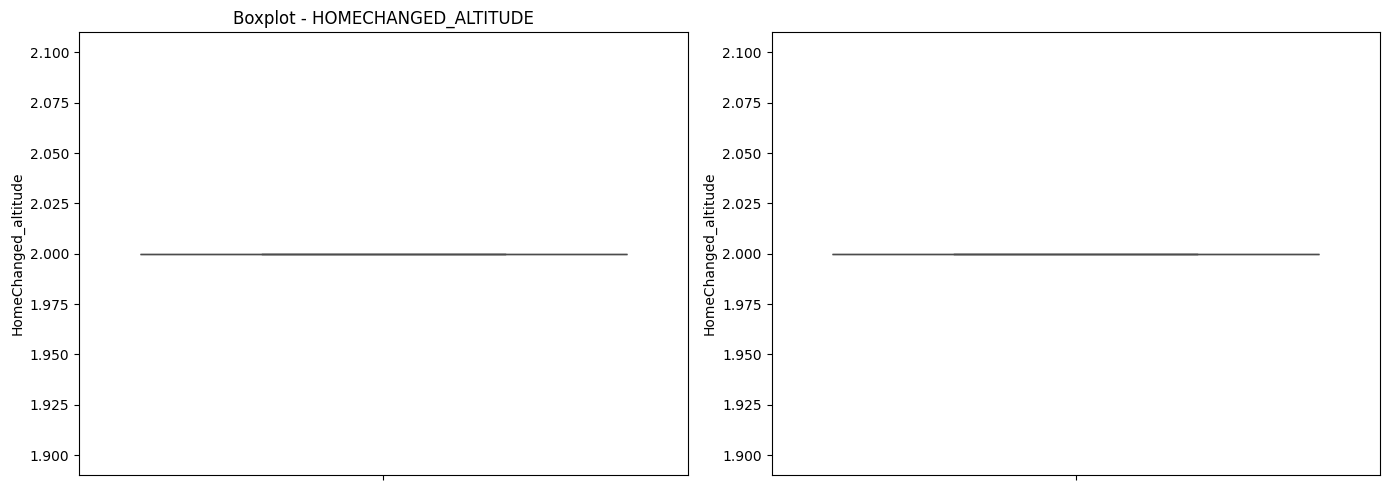

count   2624.00
mean       2.00
std        0.00
min        2.00
25%        2.00
50%        2.00
75%        2.00
90%        2.00
95%        2.00
max        2.00
Name: HomeChanged_altitude, dtype: float64

In [24]:
# HomeChanged_altitude
show_scatterplot(flight_df, "DateTime", "HomeChanged_altitude", category="")
show_boxplot(flight_df, "HomeChanged_altitude", category="")

### 03.6. _HomeTypeAvailabilityChanged_

Home type availability.

- **_HomeTypeAvailabilityChanged_type_**:
    - **TAKEOFF**: he drone has enough information to return to the take off position;
    - **PILOT**: The drone has enough information to return to the pilot position;
    - **FIRST_FIX**: The drone has not enough information, it will return to the first GPS fix;
    - **FOLLOWEE**: The drone has enough information to return to the target of the current (or last) follow me.

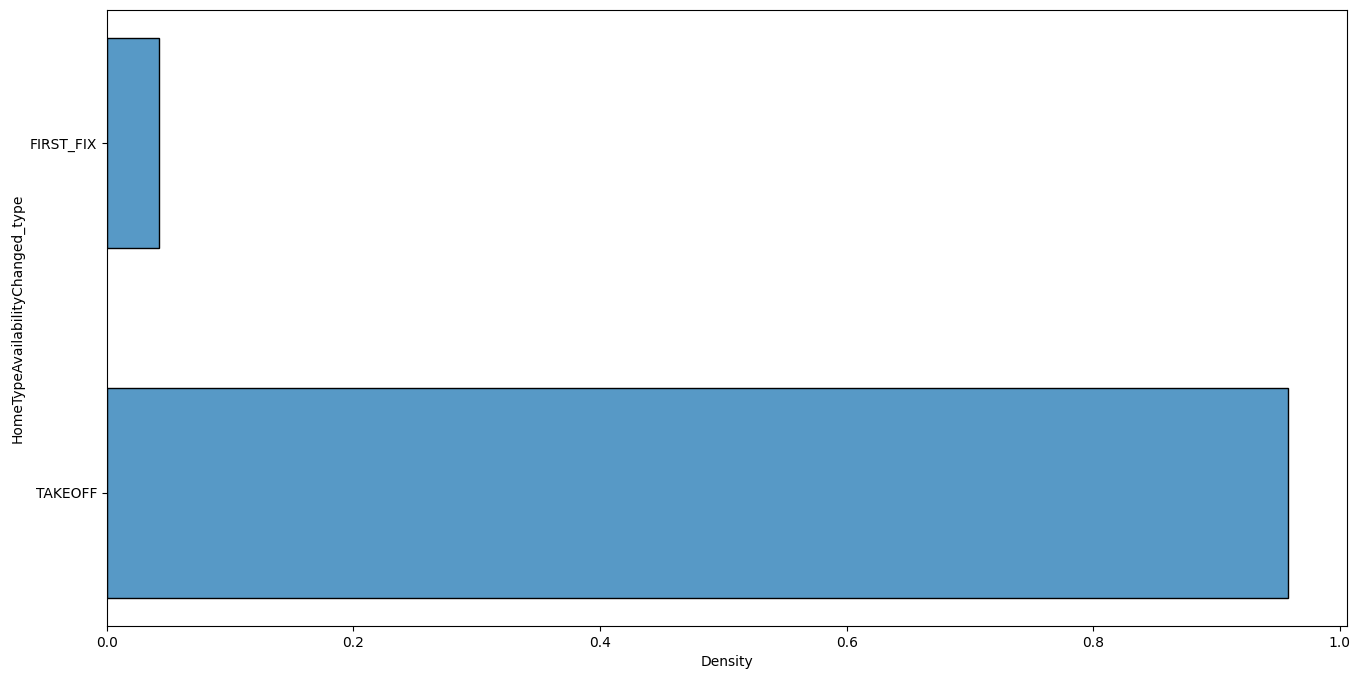

count        2624
unique          2
top       TAKEOFF
freq         2513
Name: HomeTypeAvailabilityChanged_type, dtype: object

In [25]:
# HomeTypeAvailabilityChanged_type
show_histogram(flight_df, "HomeTypeAvailabilityChanged_type", orient_h=False, describe=True, category="")

### 03.7. _FlyingStateChanged_

Flying state.

- _**FlyingStateChanged_state**_:
    - _landed:_ Landed state;
    - _takingoff:_ Taking off state;
    - _hovering:_ Hovering/Circling (for fixed wings) state;
    - _flying:_ Flying state;
    - _landing:_ Landing state;
    - _emergency:_ Emergency state;
    - _usertakeoff:_ User take off state. Waiting for user action to take off;
    - _motor_ramping:_ Motor ramping state;
    - _emergency_landing:_ Emergency landing state.

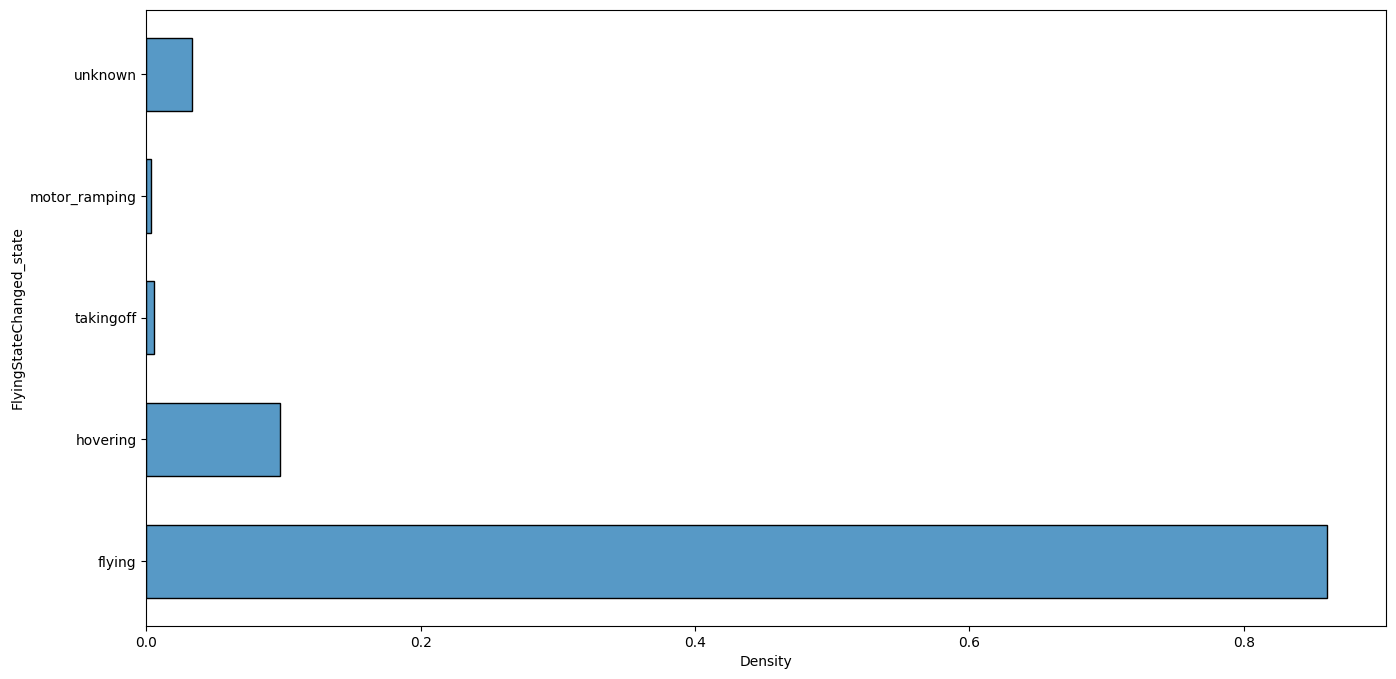

count       2624
unique         5
top       flying
freq        2259
Name: FlyingStateChanged_state, dtype: object

In [26]:
# FlyingStateChanged_state
show_histogram(flight_df, "FlyingStateChanged_state", orient_h=False, describe=True, category="")

### 03.8. _moveByEnd_

Relative move ended. Informs about the move that the drone managed to do and why it stopped.

- _**moveByEnd_dX**_: Distance traveled along the front axis [m];
- _**moveByEnd_dY**_: Distance traveled along the right axis [m];
- _**moveByEnd_dZ**_: Distance traveled along the down axis [m];
- _**moveByEnd_dPsi**_: Applied angle on heading [rad].

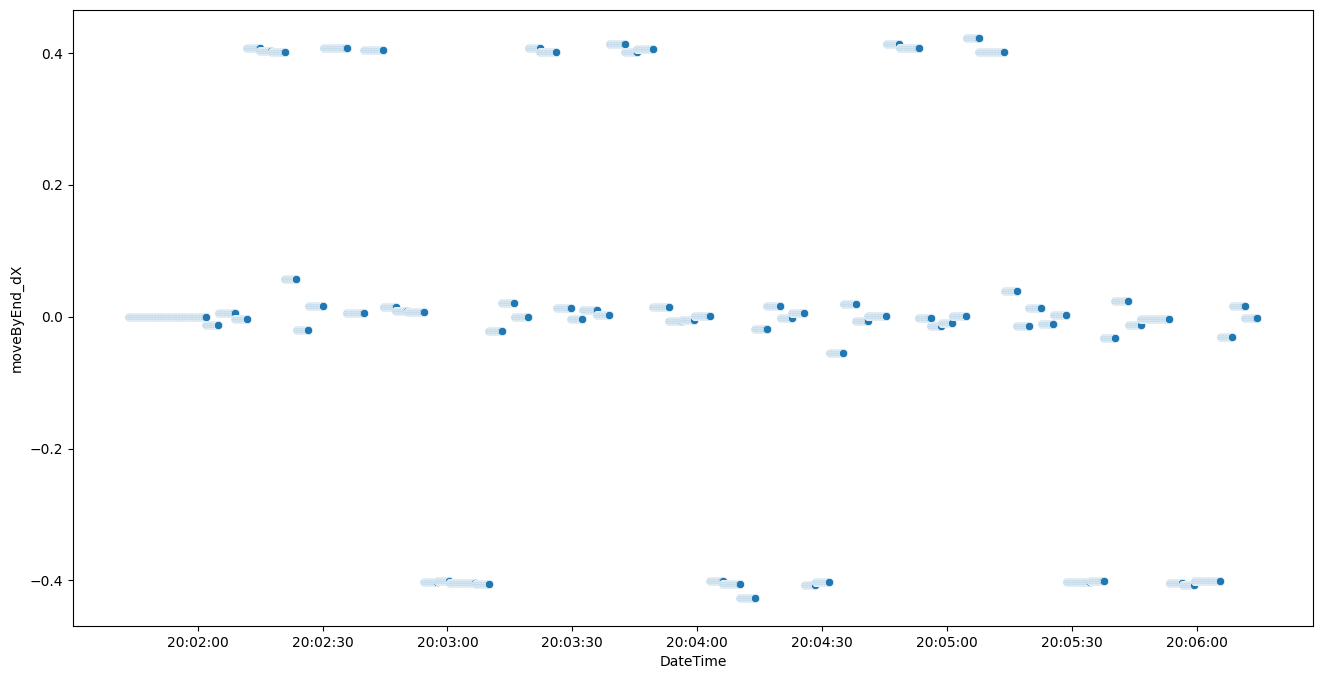

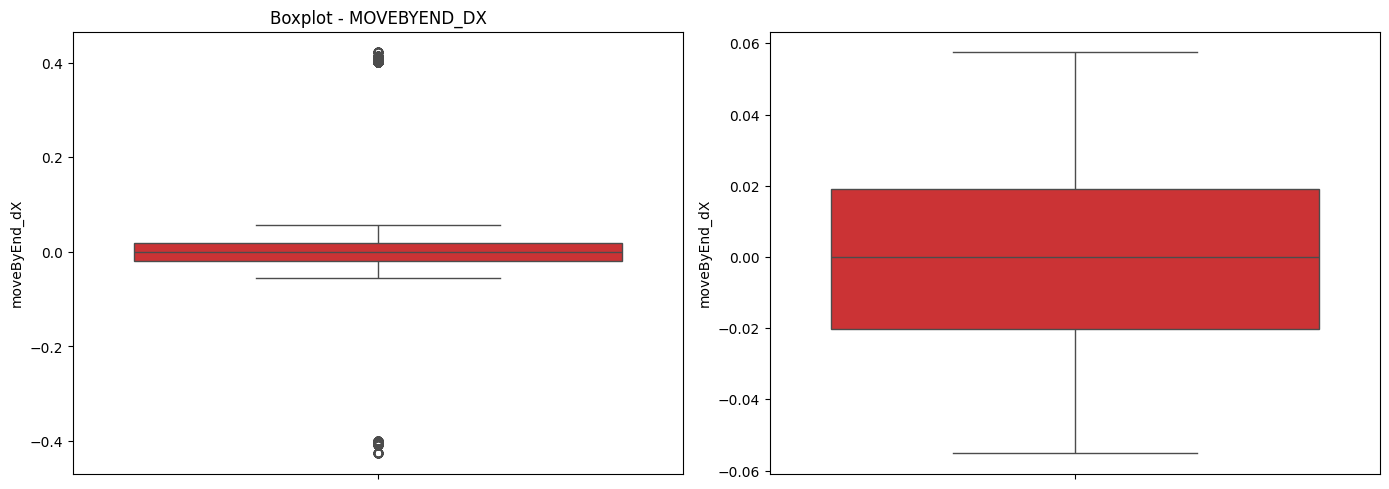

count   2624.00
mean       0.00
std        0.26
min       -0.43
25%       -0.02
50%        0.00
75%        0.02
90%        0.41
95%        0.41
max        0.42
Name: moveByEnd_dX, dtype: float64

In [27]:
# moveByEnd_dX
show_scatterplot(flight_df, "DateTime", "moveByEnd_dX", category="")
show_boxplot(flight_df, "moveByEnd_dX", category="")

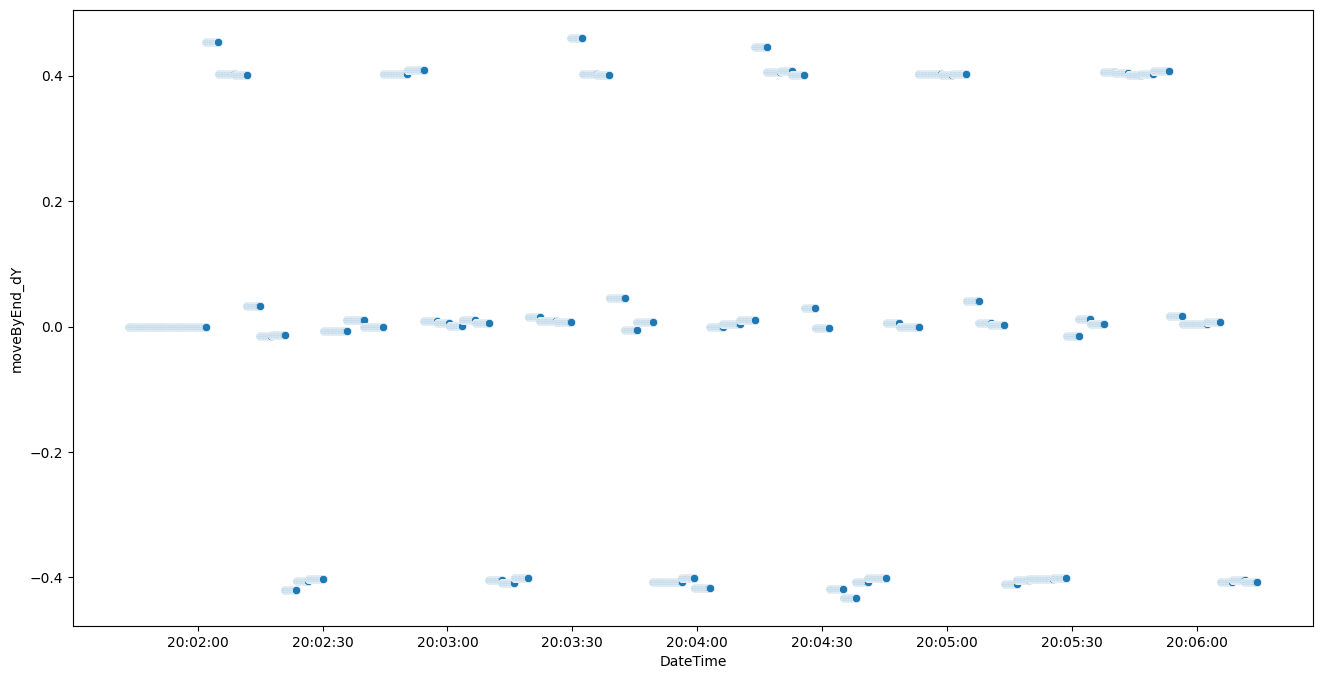

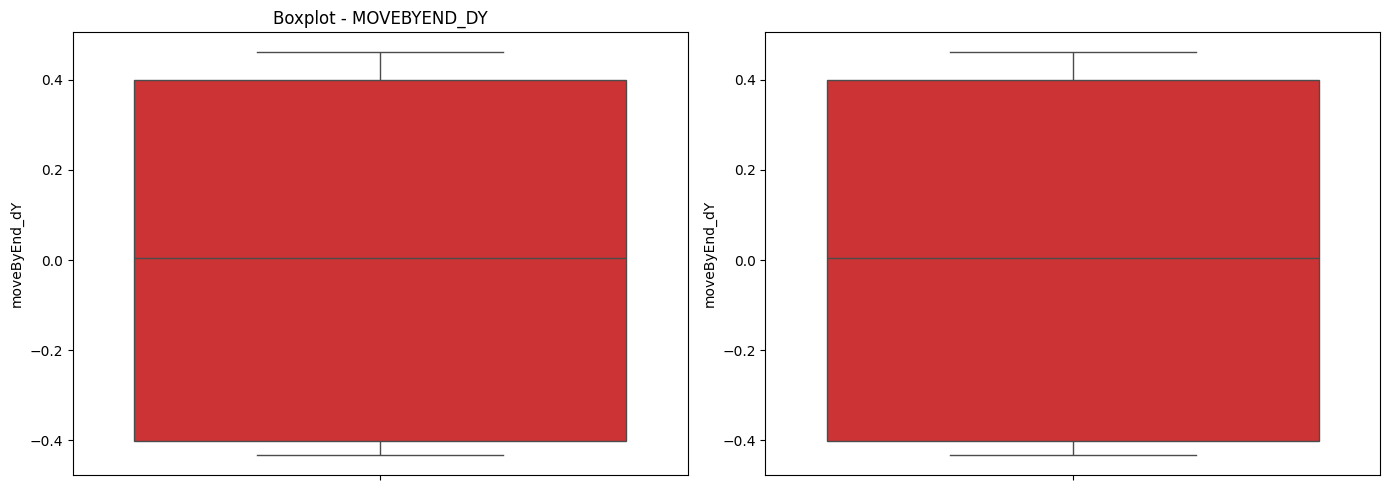

count   2624.00
mean       0.00
std        0.29
min       -0.43
25%       -0.40
50%        0.00
75%        0.40
90%        0.40
95%        0.41
max        0.46
Name: moveByEnd_dY, dtype: float64

In [28]:
# moveByEnd_dY
show_scatterplot(flight_df, "DateTime", "moveByEnd_dY", category="")
show_boxplot(flight_df, "moveByEnd_dY", category="")

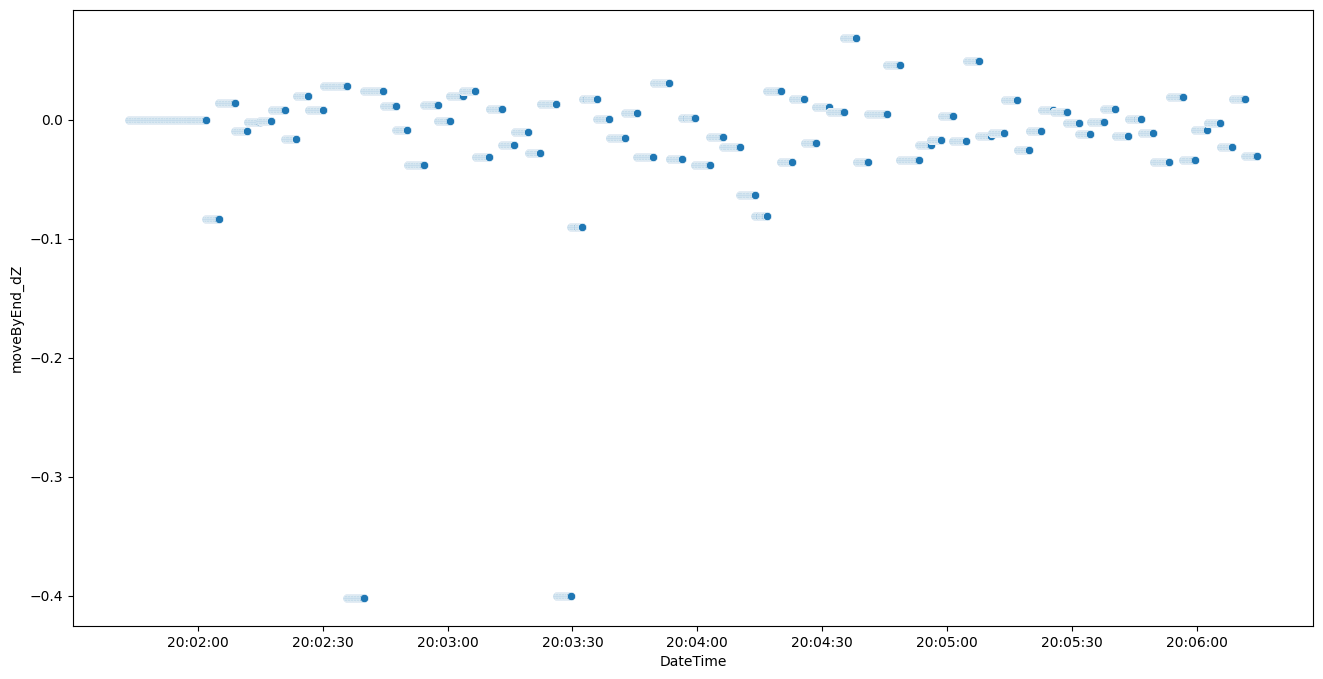

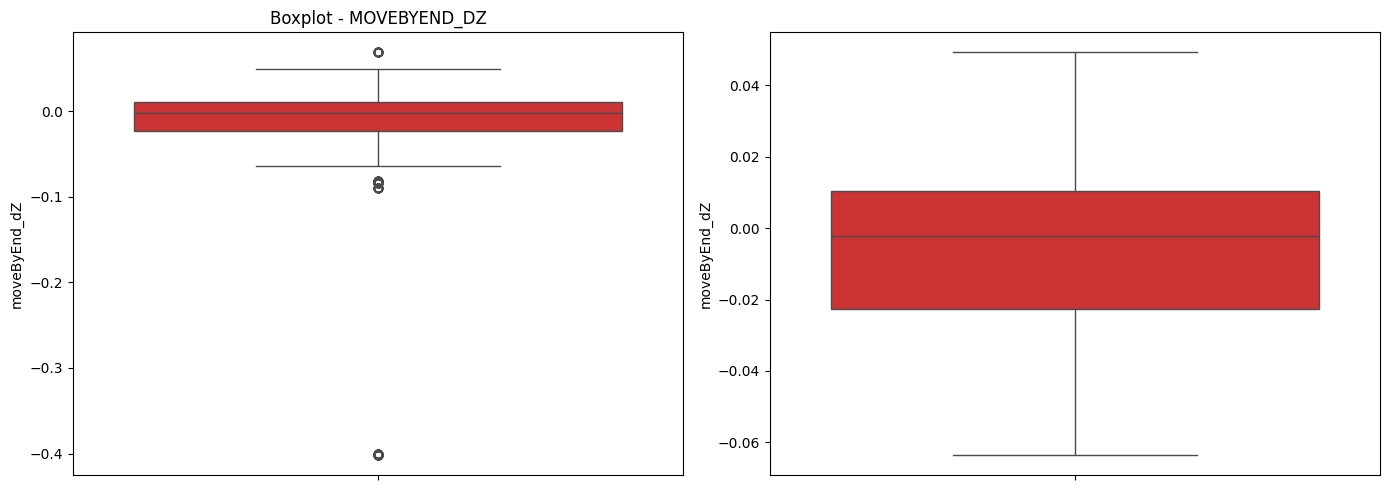

count   2624.00
mean      -0.02
std        0.07
min       -0.40
25%       -0.02
50%       -0.00
75%        0.01
90%        0.02
95%        0.03
max        0.07
Name: moveByEnd_dZ, dtype: float64

In [29]:
# moveByEnd_dZ
show_scatterplot(flight_df, "DateTime", "moveByEnd_dZ", category="")
show_boxplot(flight_df, "moveByEnd_dZ", category="")

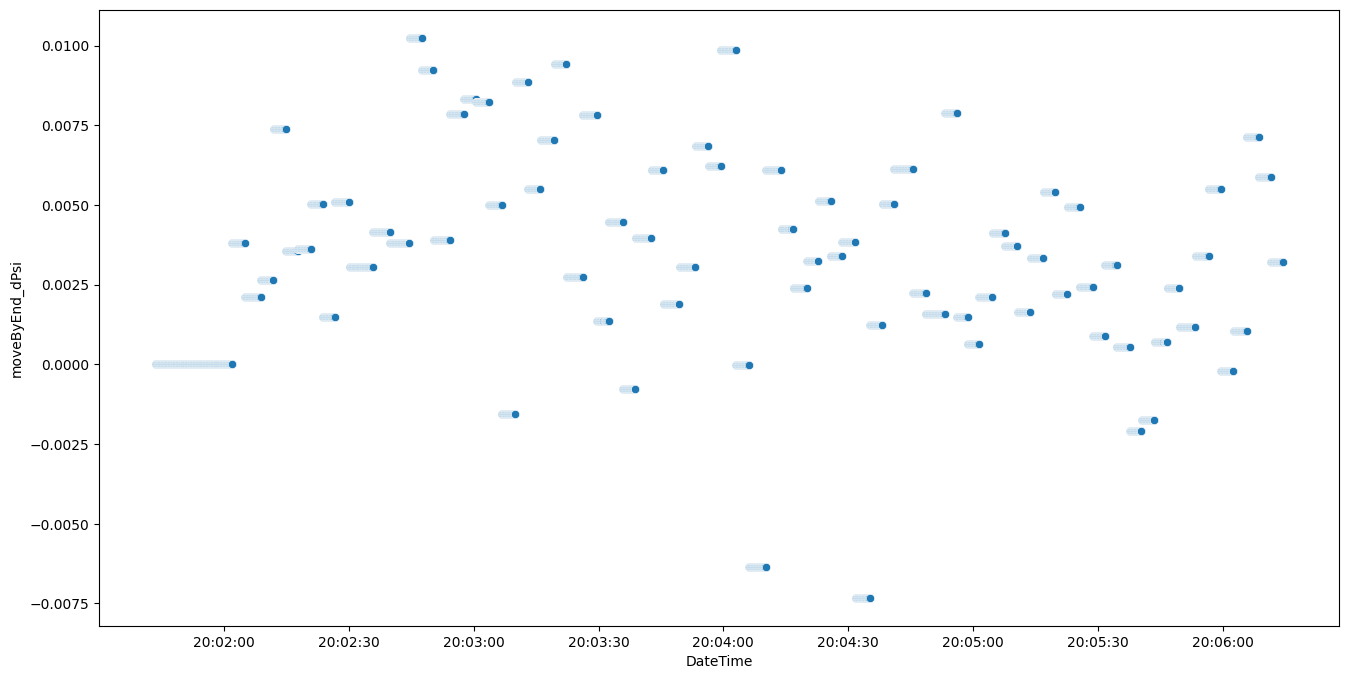

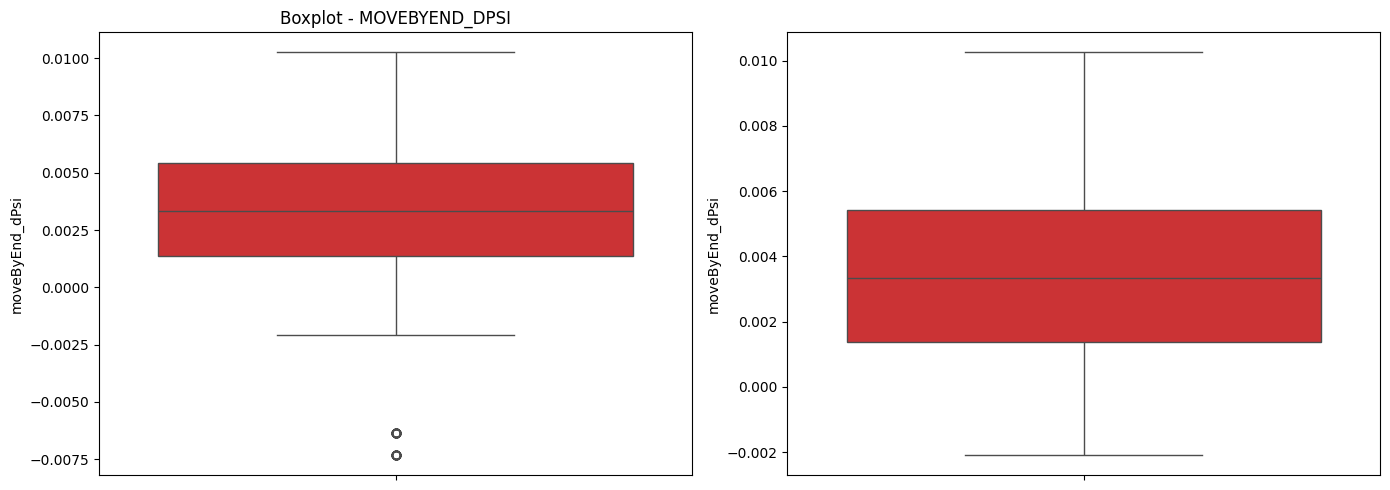

count   2624.00
mean       0.00
std        0.00
min       -0.01
25%        0.00
50%        0.00
75%        0.01
90%        0.01
95%        0.01
max        0.01
Name: moveByEnd_dPsi, dtype: float64

In [30]:
# moveByEnd_dPsi
show_scatterplot(flight_df, "DateTime", "moveByEnd_dPsi", category="")
show_boxplot(flight_df, "moveByEnd_dPsi", category="")

### 03.9. _WifiSignalChanged_

RSSI (Wifi Signal between controller and product) changed.

- _**WifiSignalChanged_rssi**_: RSSI of the signal between controller and the product (in dbm).

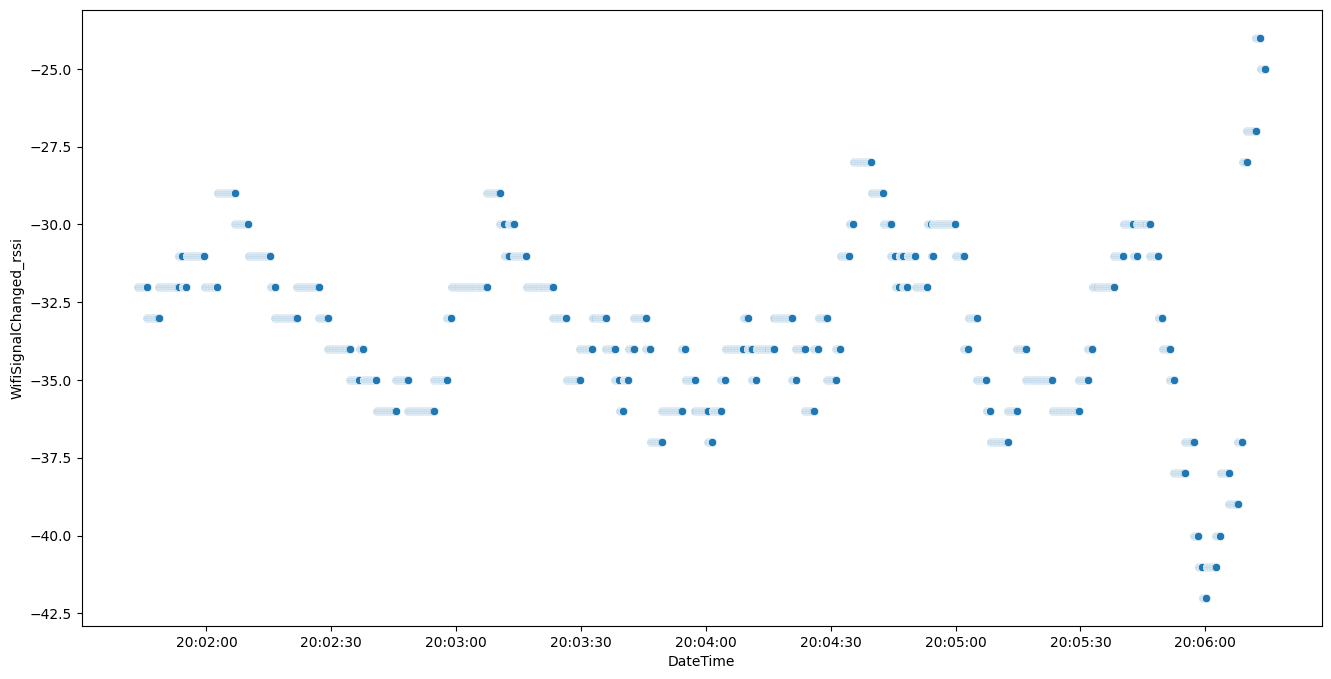

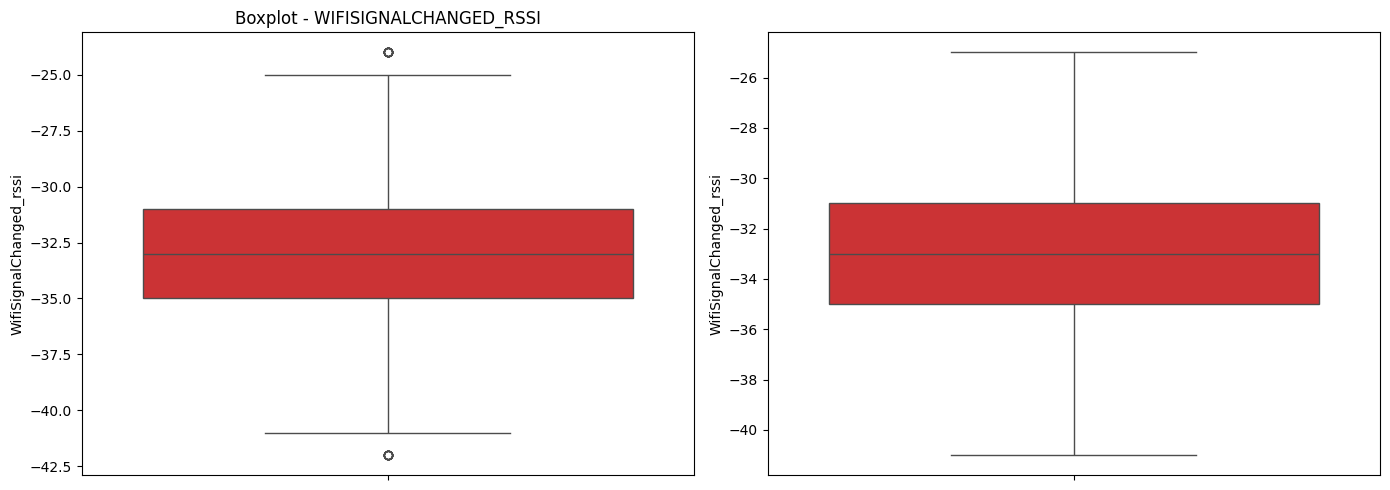

count   2624.00
mean     -33.29
std        2.79
min      -42.00
25%      -35.00
50%      -33.00
75%      -31.00
90%      -30.00
95%      -29.00
max      -24.00
Name: WifiSignalChanged_rssi, dtype: float64

In [31]:
# WifiSignalChanged_rssi
show_scatterplot(flight_df, "DateTime", "WifiSignalChanged_rssi", category="")
show_boxplot(flight_df, "WifiSignalChanged_rssi", category="")

### 03.10. _BatteryStateChanged_

Battery state.

- _**BatteryStateChanged_percent**_: Battery percentage.

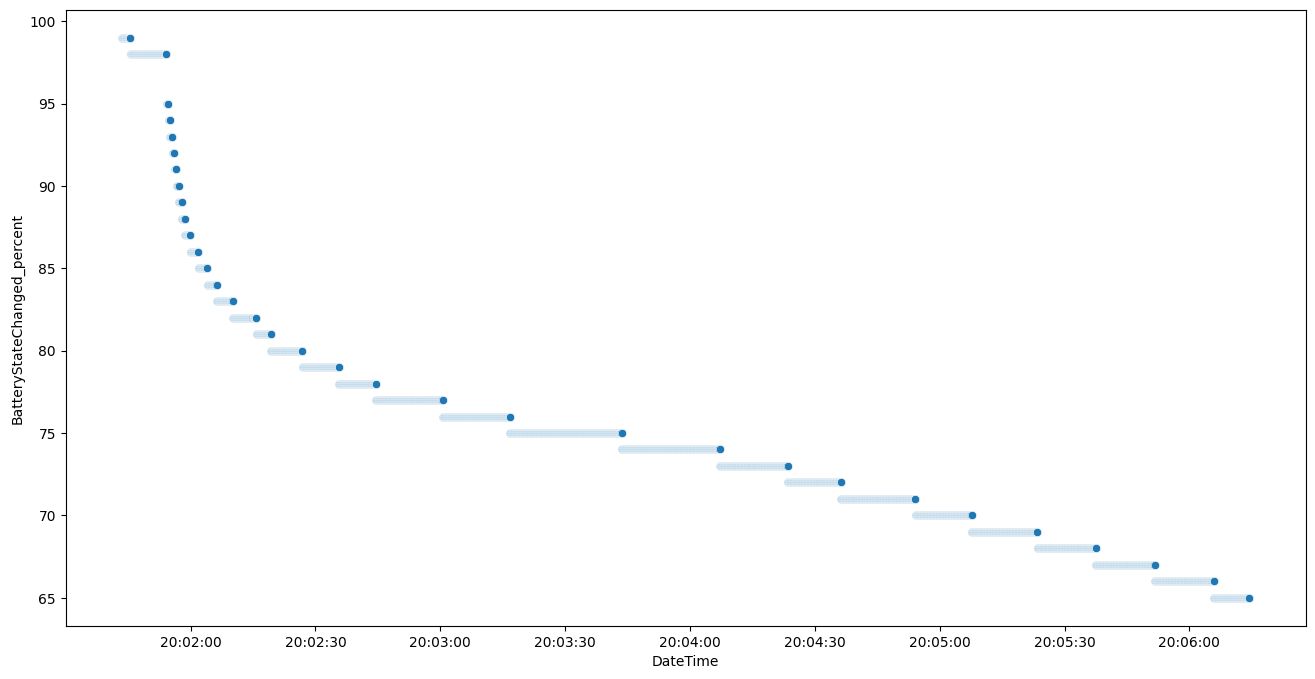

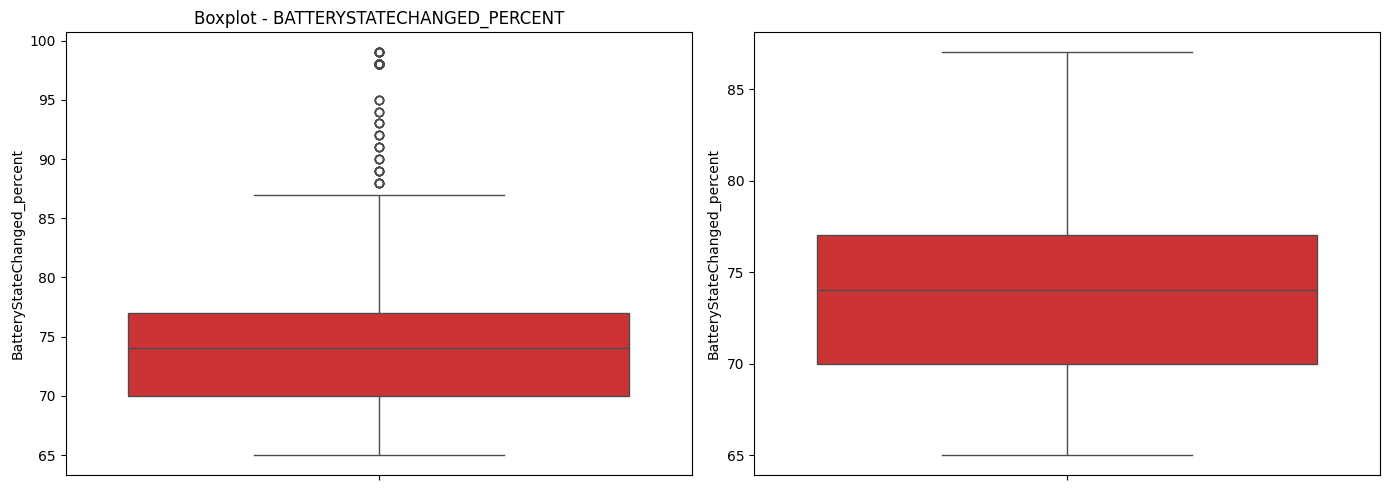

count   2624.00
mean      74.58
std        7.16
min       65.00
25%       70.00
50%       74.00
75%       77.00
90%       82.00
95%       90.00
max       99.00
Name: BatteryStateChanged_percent, dtype: float64

In [32]:
# BatteryStateChanged_percent
show_scatterplot(flight_df, "DateTime", "BatteryStateChanged_percent", category="")
show_boxplot(flight_df, "BatteryStateChanged_percent", category="")

## 04. Categorical Encoder

In [33]:
# FlyingStateChanged_state
flight_df = categorical_encoder(flight_df, [
    "unknown",
    "landed",
    "takingoff",
    "hovering",
    "flying",
    "landing",
    "emergency",
    "usertakeoff",
    "motor_ramping",
    "motor_emergency_landing"], "FlyingStateChanged_state")

# HomeTypeAvailabilityChanged_type
flight_df = categorical_encoder(flight_df, [
    "UNKNOWN",
    "TAKEOFF",
    "PILOT",
    "FIRST_FIX",
    "FOLLOWEE"], "HomeTypeAvailabilityChanged_type")

In [34]:
flight_df.drop(columns=["Timestamp"], inplace=True)  # Drop non-useful columns. DateTime replaces Timestamp
# DateTime as first column
flight_df = flight_df[["DateTime"] + [col for col in flight_df.columns if col != "DateTime"]]

In [35]:
print("Final Selected Columns:", ", ".join(flight_df.columns))

Final Selected Columns: DateTime, SpeedChanged_speedX, SpeedChanged_speedY, SpeedChanged_speedZ, AltitudeChanged_altitude, AttitudeChanged_roll, AttitudeChanged_pitch, AttitudeChanged_yaw, GpsLocationChanged_latitude, GpsLocationChanged_longitude, GpsLocationChanged_altitude, GpsLocationChanged_latitude_accuracy, GpsLocationChanged_longitude_accuracy, GpsLocationChanged_altitude_accuracy, HomeChanged_latitude, HomeChanged_longitude, HomeChanged_altitude, moveByEnd_dX, moveByEnd_dY, moveByEnd_dZ, moveByEnd_dPsi, WifiSignalChanged_rssi, BatteryStateChanged_percent, FlyingStateChanged_state_unknown, FlyingStateChanged_state_landed, FlyingStateChanged_state_takingoff, FlyingStateChanged_state_hovering, FlyingStateChanged_state_flying, FlyingStateChanged_state_landing, FlyingStateChanged_state_emergency, FlyingStateChanged_state_usertakeoff, FlyingStateChanged_state_motor_ramping, FlyingStateChanged_state_motor_emergency_landing, HomeTypeAvailabilityChanged_type_UNKNOWN, HomeTypeAvailabilit

In [36]:
# Save data after preprocessing
flight_df.to_csv(f"{DATA_PATH}flight_example_preprocessed.csv", index=False)